# Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.


As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [25,10]

In [2]:
train = pd.read_csv('train_qWM28Yl.csv')
test = pd.read_csv('test_zo1G9sv.csv')

In [3]:
train.shape, test.shape

((58592, 44), (39063, 43))

In [4]:
#combined 

combined = pd.concat([train, test], ignore_index=True)
combined.shape

(97655, 44)

In [5]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [6]:
# Categorical

combined.select_dtypes(exclude = np.number).columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [7]:
cat_cols = [ 'area_cluster', 'segment', 'model', 'fuel_type','engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim']



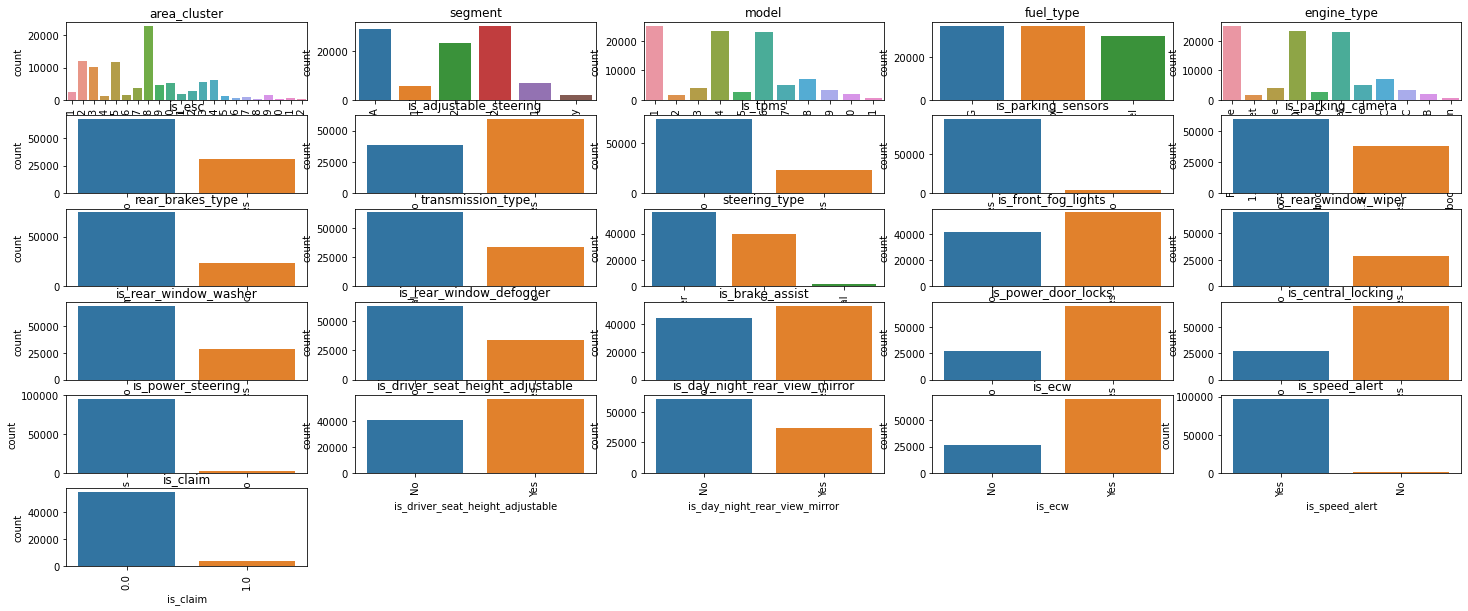

In [8]:
nrows = 6
ncols = 5
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i])
    plt.title(i)
    iterator+=1
    plt.xticks(rotation=90)

plt.tight_layout
plt.show()

#steering type - yes, break assist is given
#central locking is available and driver seat height is adjustable
#doors have power, ecw is there
#target variable is highly imbalanced

In [9]:
#describing clusters

train.loc[train.is_claim==1].describe(include='all')

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
count,3748,3748.000000,3748.000000,3748.000000,3748,3748.000000,3748.000000,3748,3748,3748,3748,3748,3748,3748.000000,3748,3748,3748,3748,3748,3748,3748.000000,3748.000000,3748,3748.000000,3748,3748.000000,3748.000000,3748.000000,3748.000000,3748.000000,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748.000000,3748.0
unique,3748,NaN,NaN,NaN,22,NaN,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,ID22292,NaN,NaN,NaN,C8,NaN,NaN,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,NaN,Power,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,954,NaN,NaN,1256,939,1363,1220,1220,939,NaN,2551,2370,2847,3620,2290,2847,NaN,NaN,2438,NaN,2078,NaN,NaN,NaN,NaN,NaN,2254,2646,2646,2418,2136,2757,2757,3675,2269,2267,2757,3733,NaN,NaN
mean,NaN,0.736002,0.063311,0.479966,NaN,17623.820438,1.761740,NaN,NaN,NaN,NaN,NaN,NaN,3.156617,NaN,NaN,NaN,NaN,NaN,NaN,1170.177161,3.651814,NaN,5.244397,NaN,4.855269,3858.214514,1676.498666,1552.719050,1388.441302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.780149,1.0
std,NaN,0.389169,0.053058,0.126140,NaN,16130.125259,1.139372,NaN,NaN,NaN,NaN,NaN,NaN,1.840379,NaN,NaN,NaN,NaN,NaN,NaN,263.939687,0.476459,NaN,0.429786,NaN,0.226001,308.721465,110.765822,78.119627,210.556478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386084,0.0
min,NaN,0.002850,0.000000,0.288462,NaN,290.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,5.000000,NaN,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
25%,NaN,0.399630,0.020000,0.384615,NaN,6112.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,998.000000,3.000000,NaN,5.000000,NaN,4.600000,3655.000000,1515.000000,1490.000000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
50%,NaN,0.833247,0.050000,0.461538,NaN,8794.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,5.000000,NaN,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.0
75%,NaN,1.084144,0.100000,0.557692,NaN,27003.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,5.000000,NaN,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.0


In [10]:
combined.select_dtypes(include = np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [11]:
combined.ncap_rating.unique()

array([0, 2, 3, 5, 4], dtype=int64)

In [12]:
combined['ncap_rating'] = combined['ncap_rating'].astype('object')

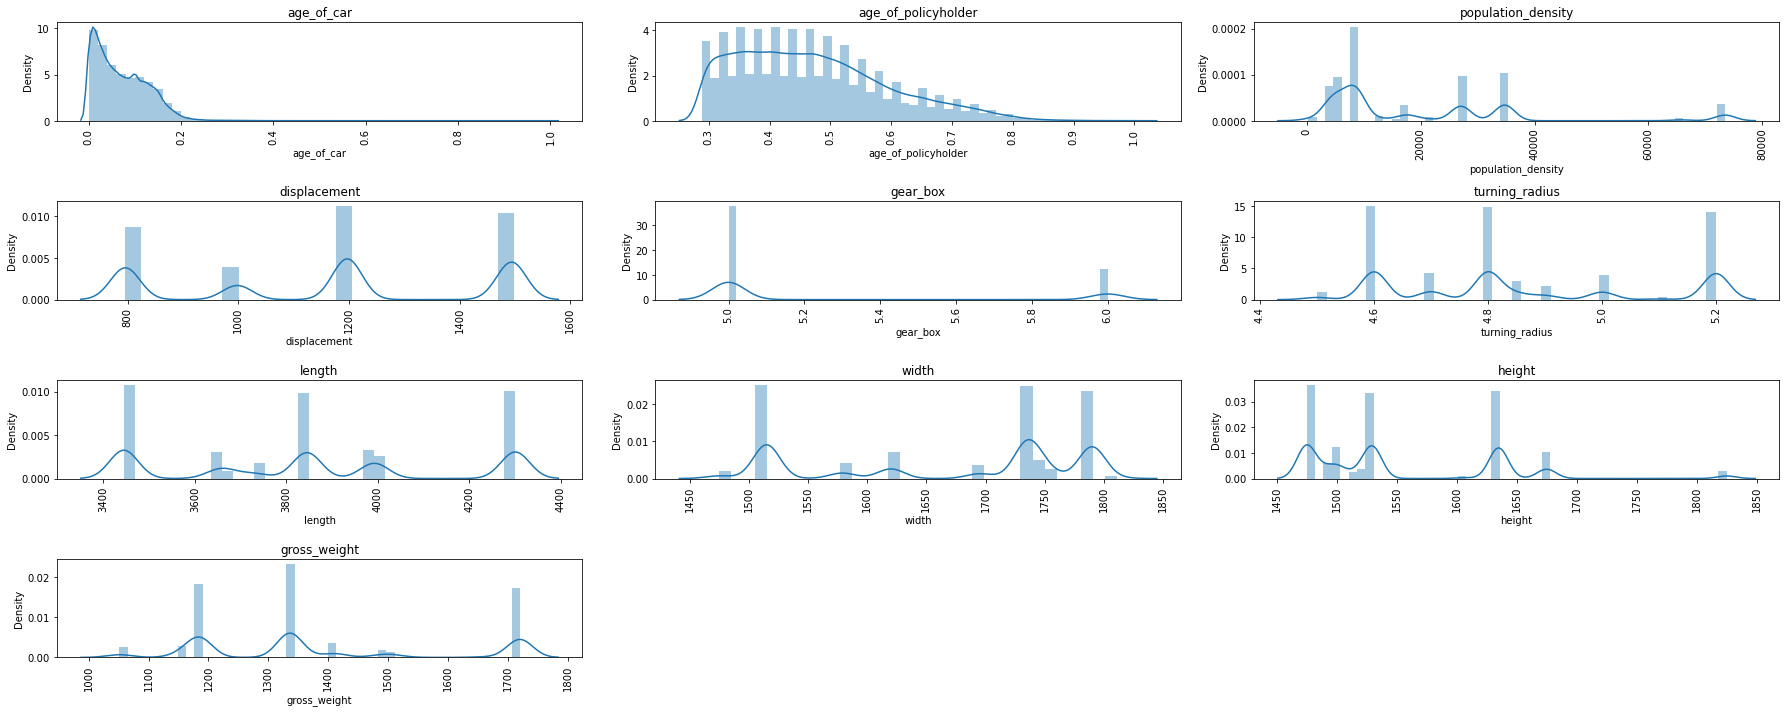

In [13]:
num_cols = ['age_of_car', 'age_of_policyholder',
       'population_density', 'displacement',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight']

nrows = 4
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined[i])
    iterator+=1
    plt.title(i)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
combined.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,is_claim
count,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,58592.000000
mean,0.611269,0.069508,0.469287,18822.60809,1.763586,3.138109,1161.655829,3.624423,5.245579,4.853024,3850.017715,1672.050187,1553.214500,1384.966750,0.063968
std,0.414494,0.056774,0.122560,17656.79257,1.135832,1.831993,266.560176,0.484274,0.430432,0.228059,311.745860,112.042508,79.385788,212.543007,0.244698
min,0.002735,0.000000,0.288462,290.00000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.209729,0.020000,0.375000,6112.00000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.573891,0.060000,0.451923,8794.00000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,0.000000
75%,1.039740,0.110000,0.548077,27003.00000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,0.000000
max,1.396641,1.000000,1.000000,73430.00000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,1.000000


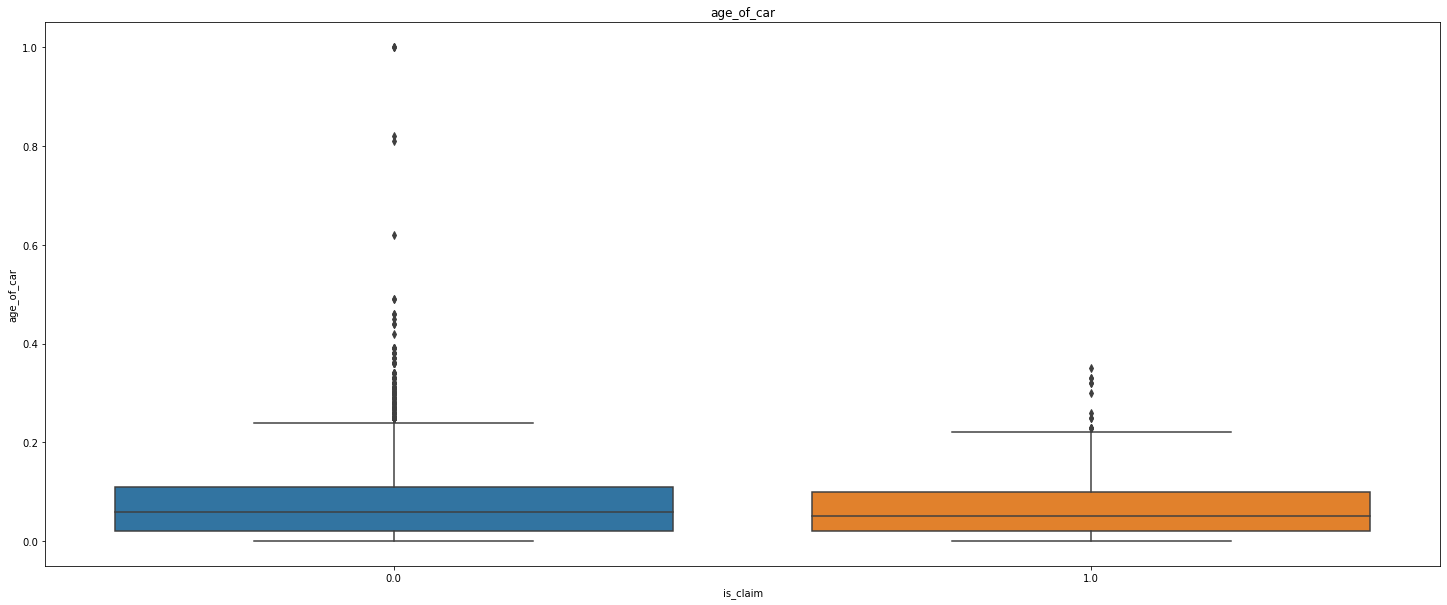

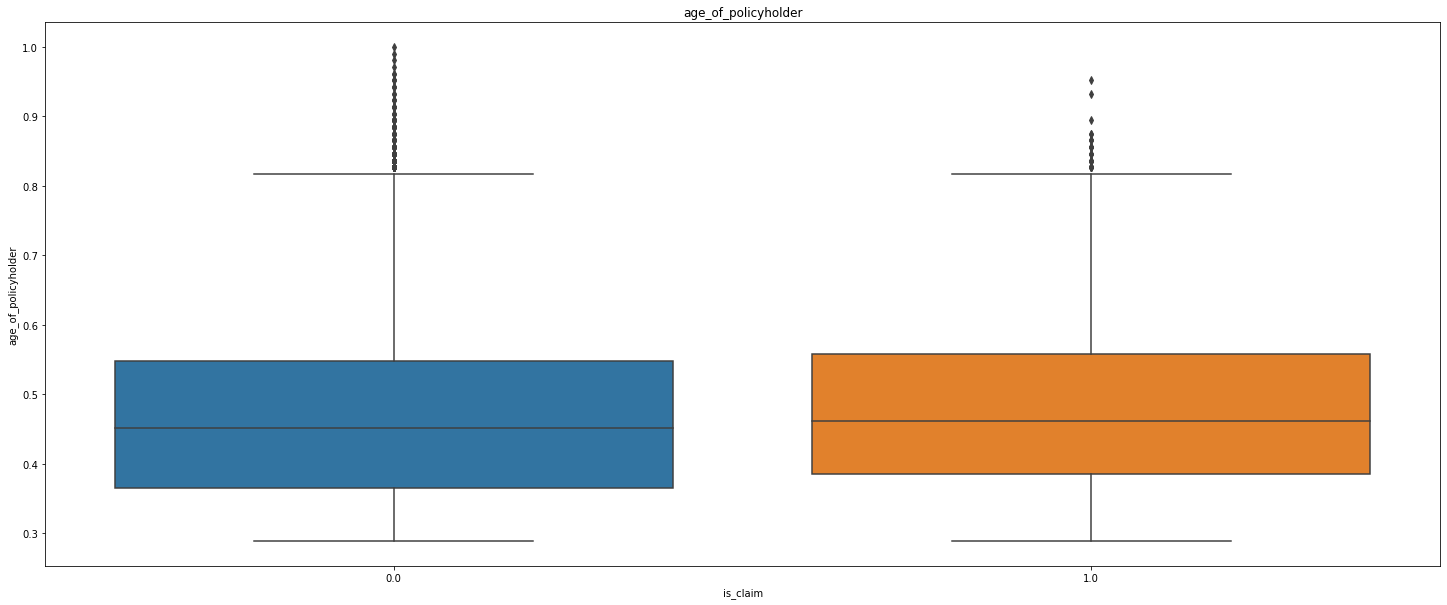

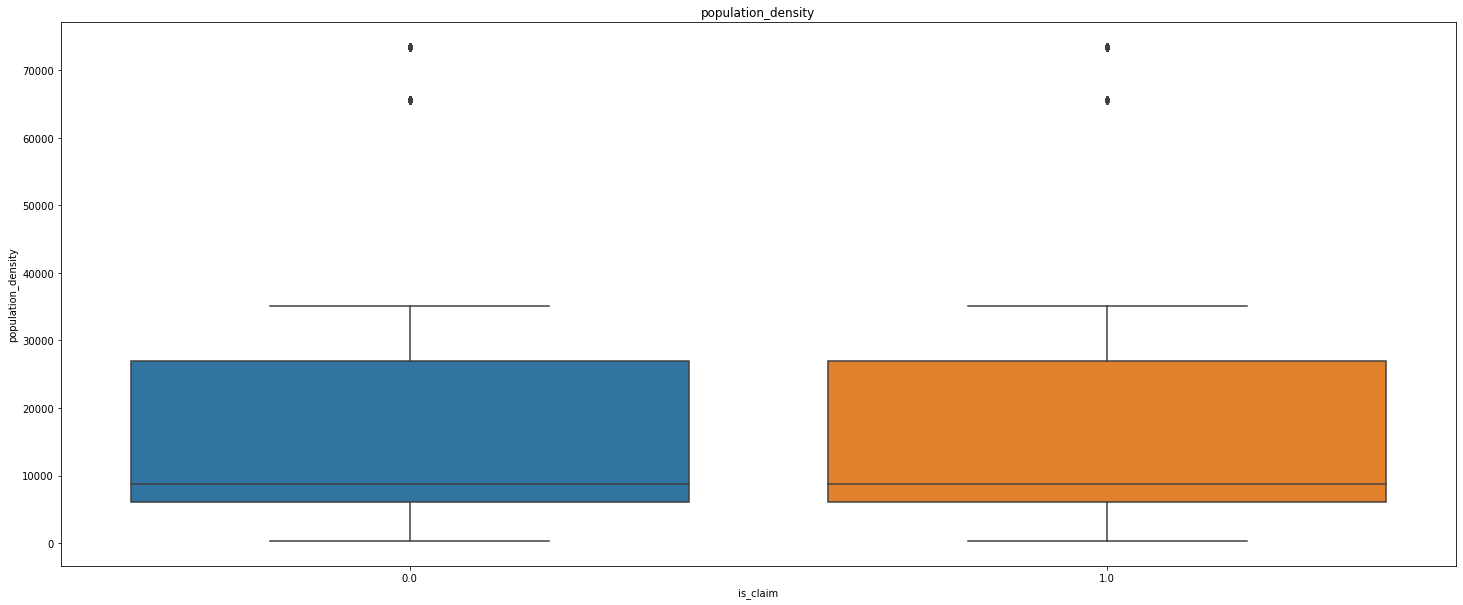

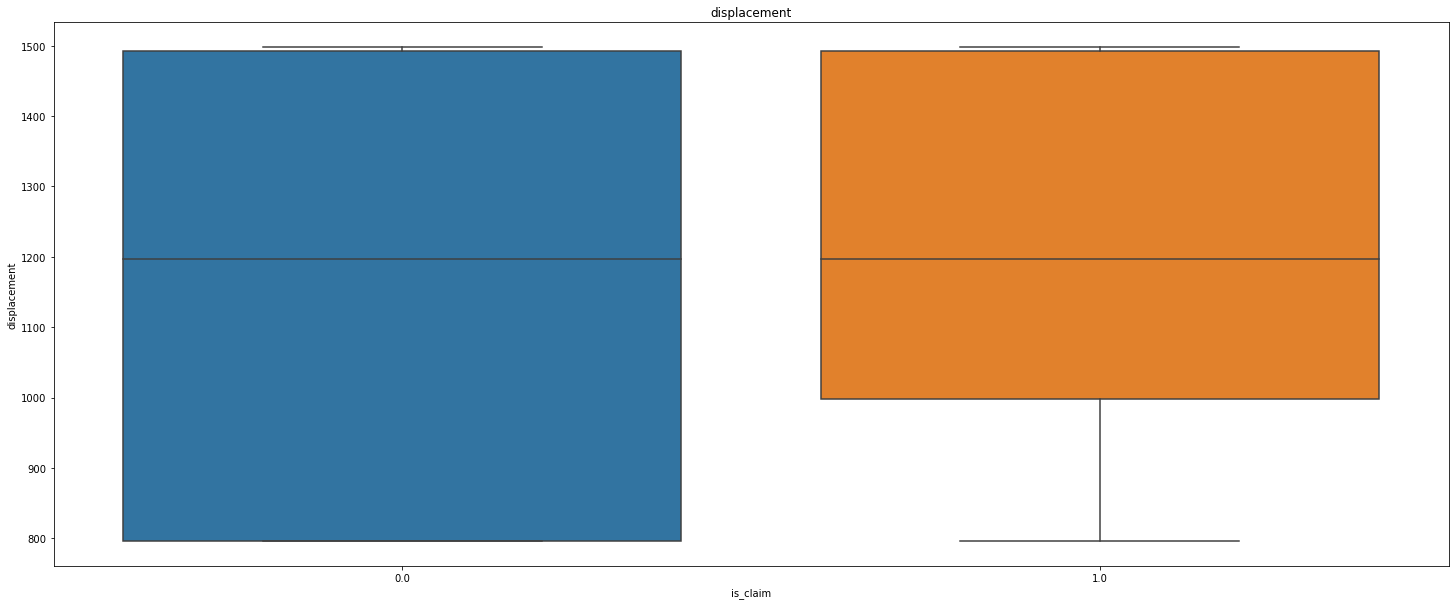

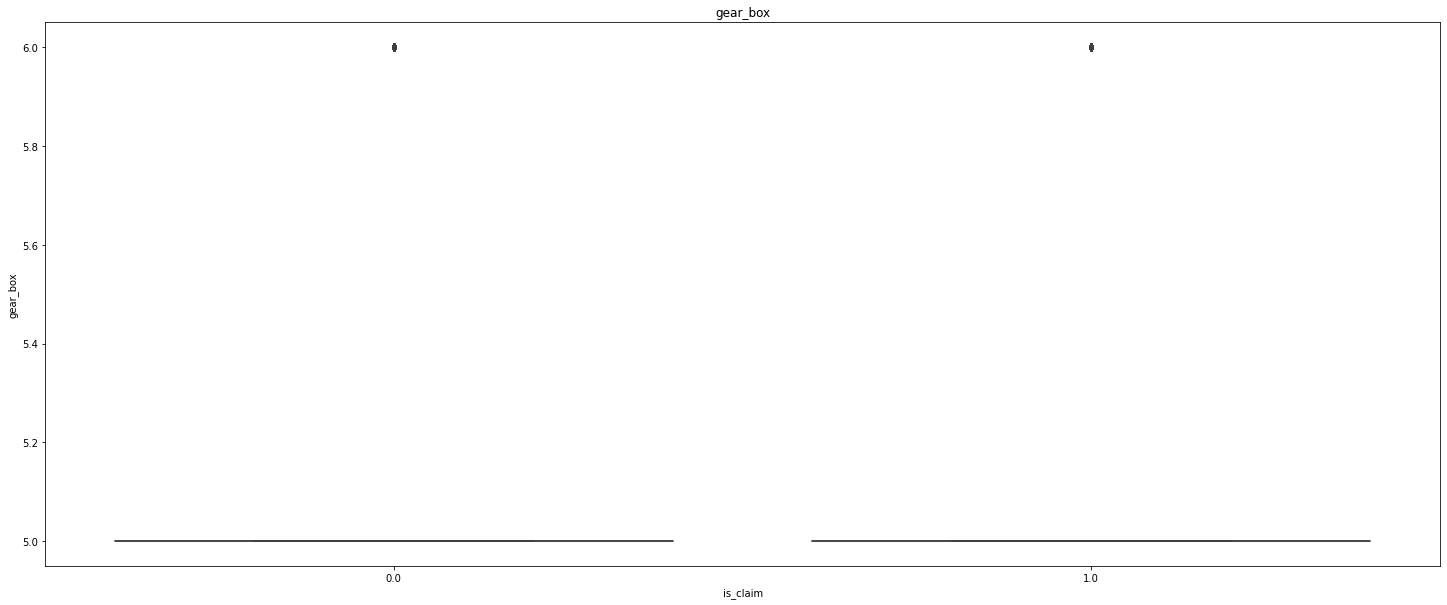

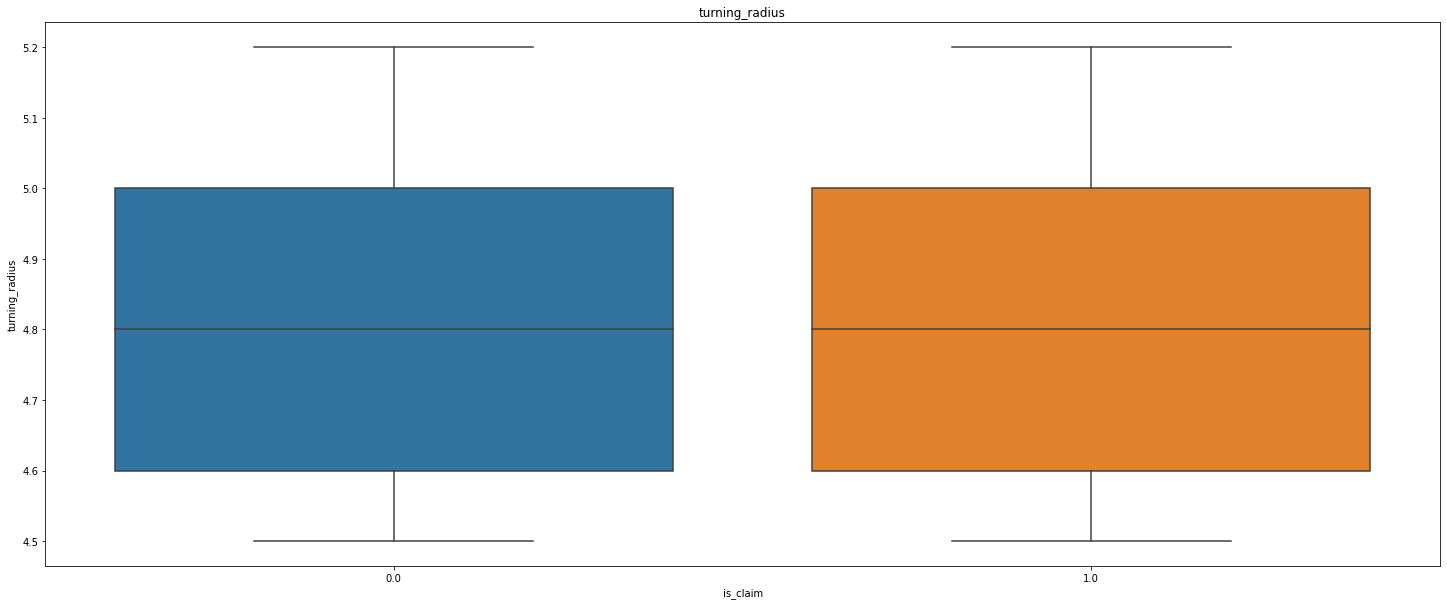

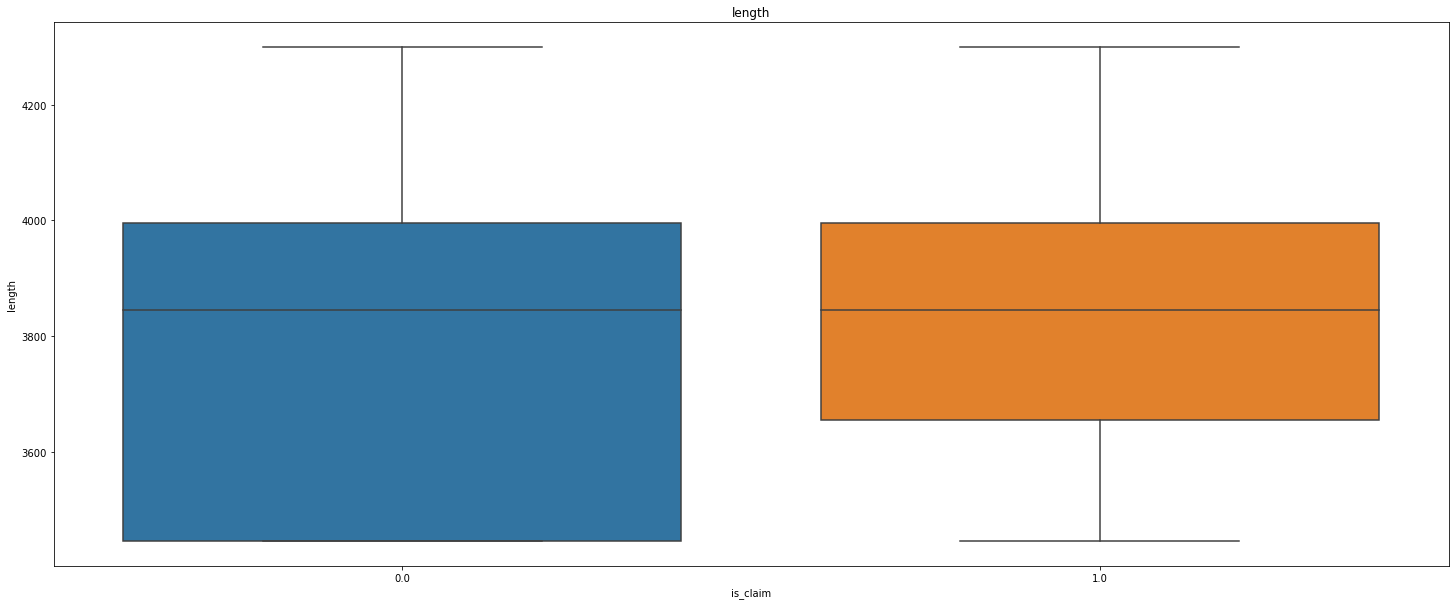

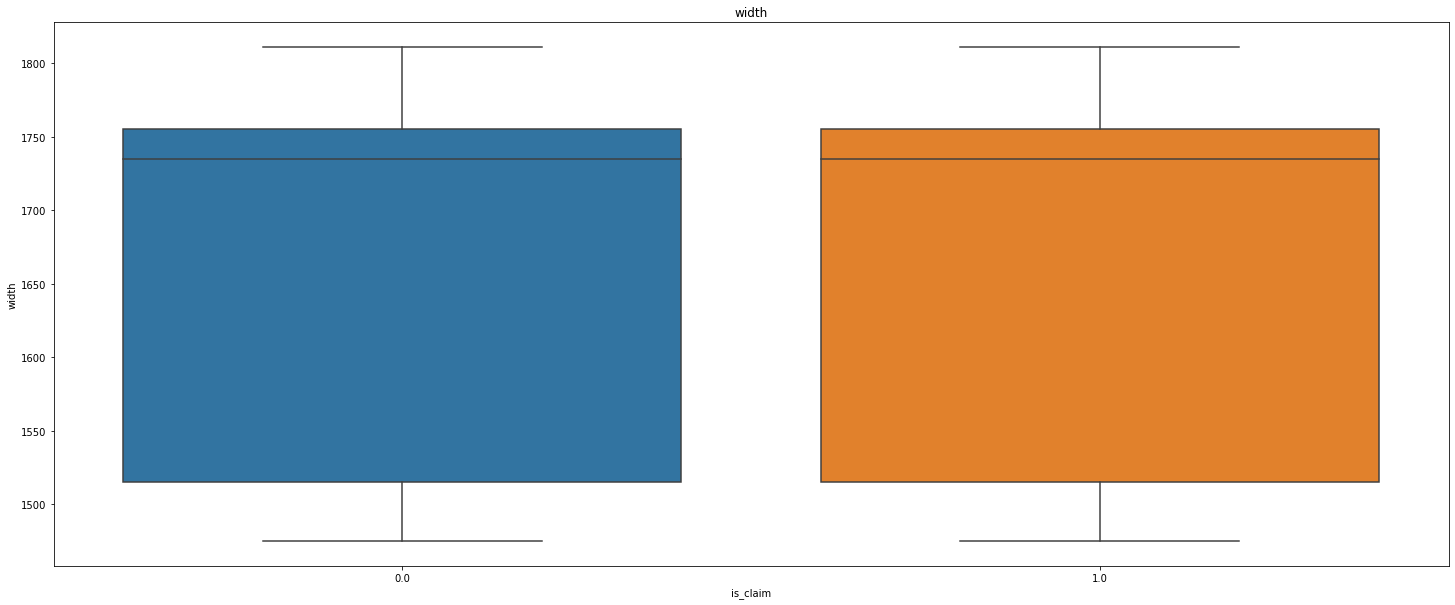

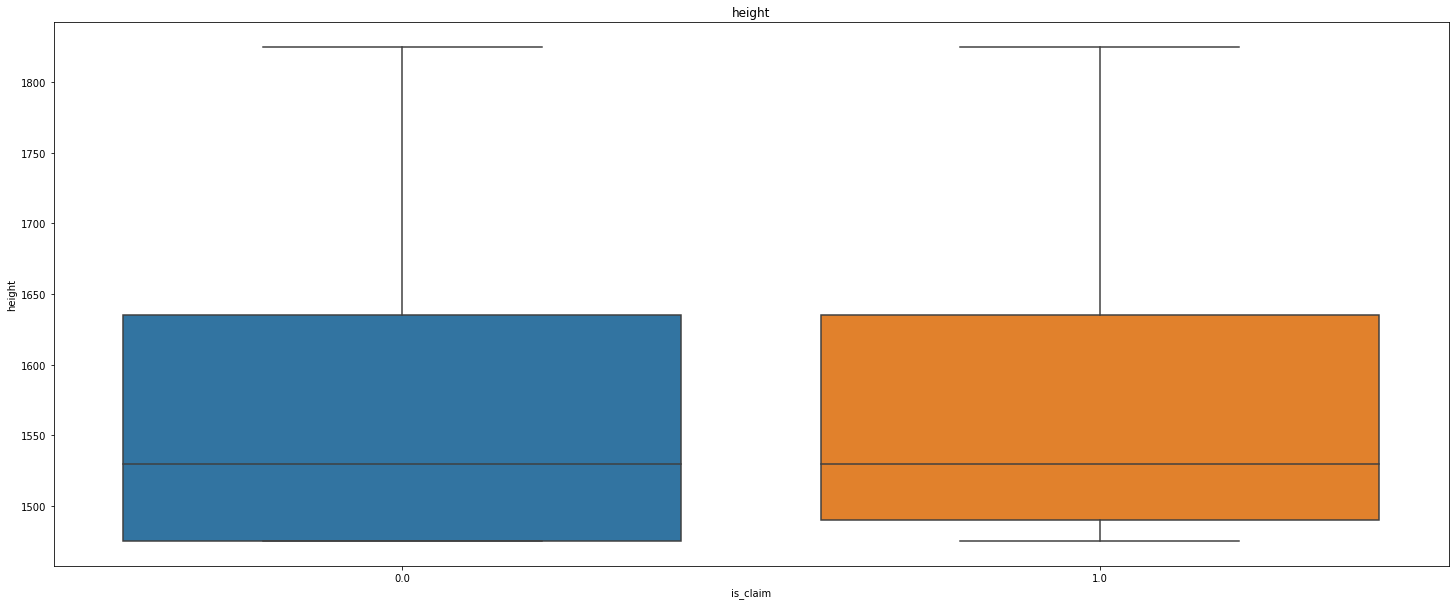

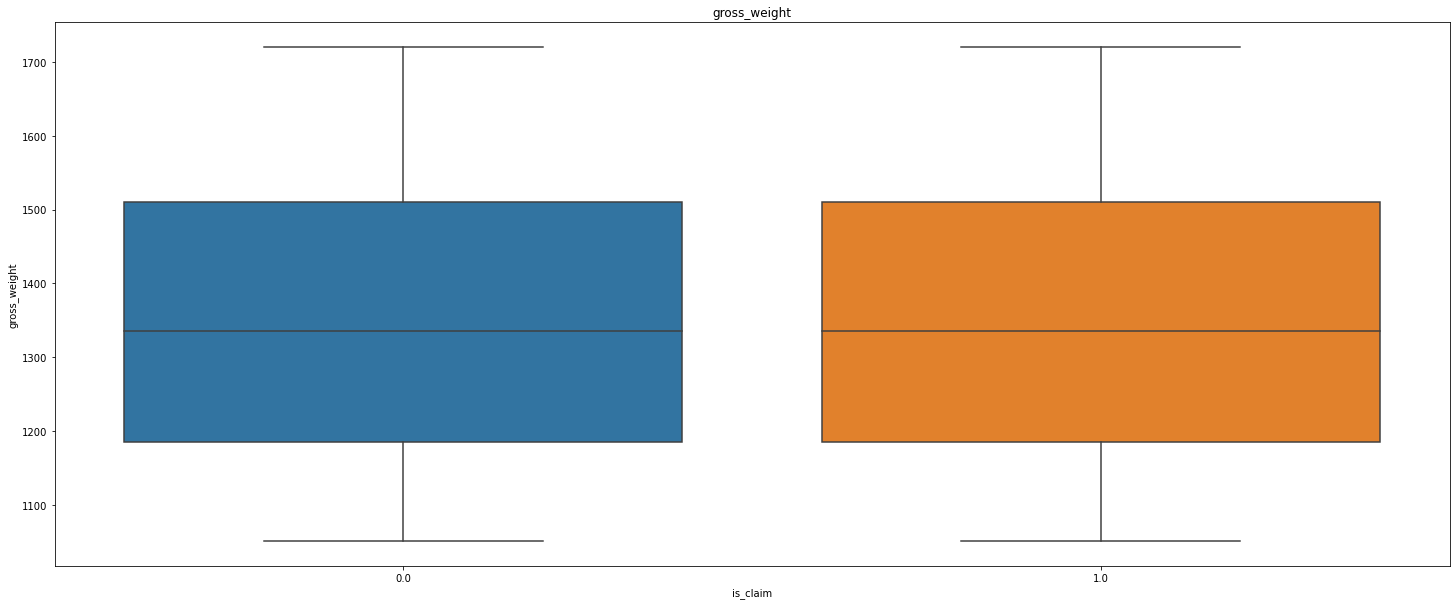

<Figure size 1800x720 with 0 Axes>

In [15]:
# Bivariate Analysis

for i in num_cols:
    sns.boxplot(combined['is_claim'],combined[i])
    plt.title(i)
    plt.show()
    
plt.tight_layout()


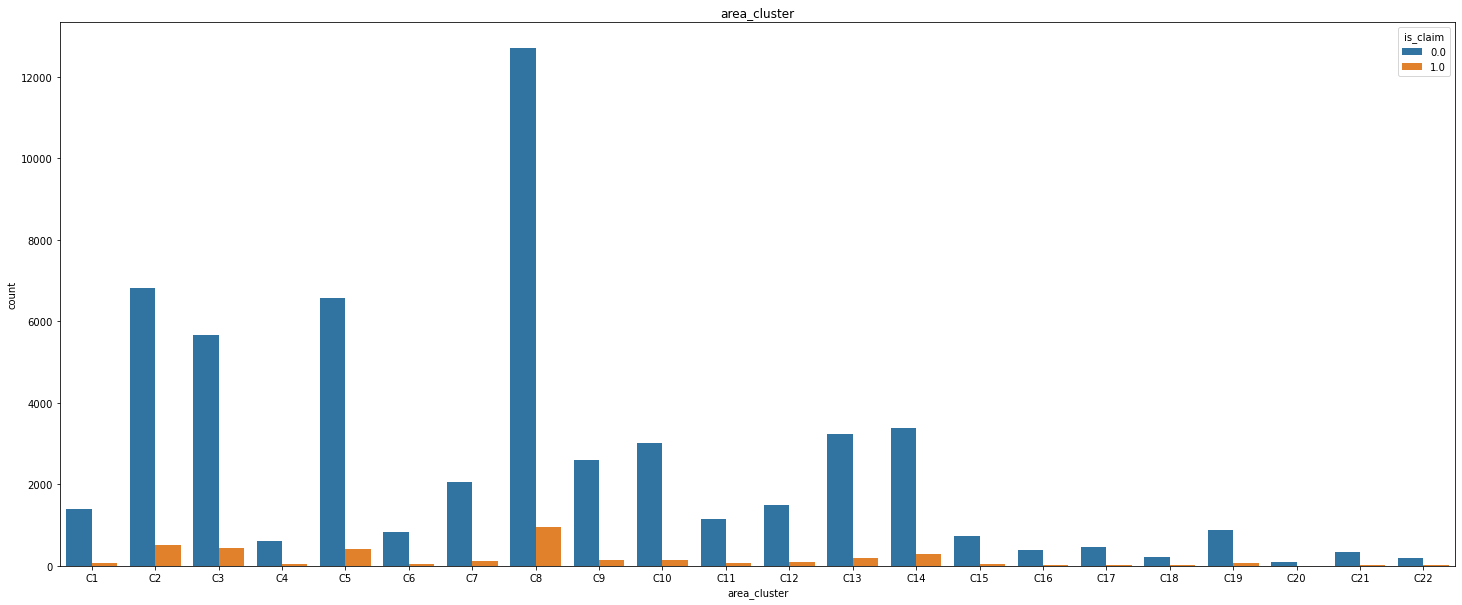

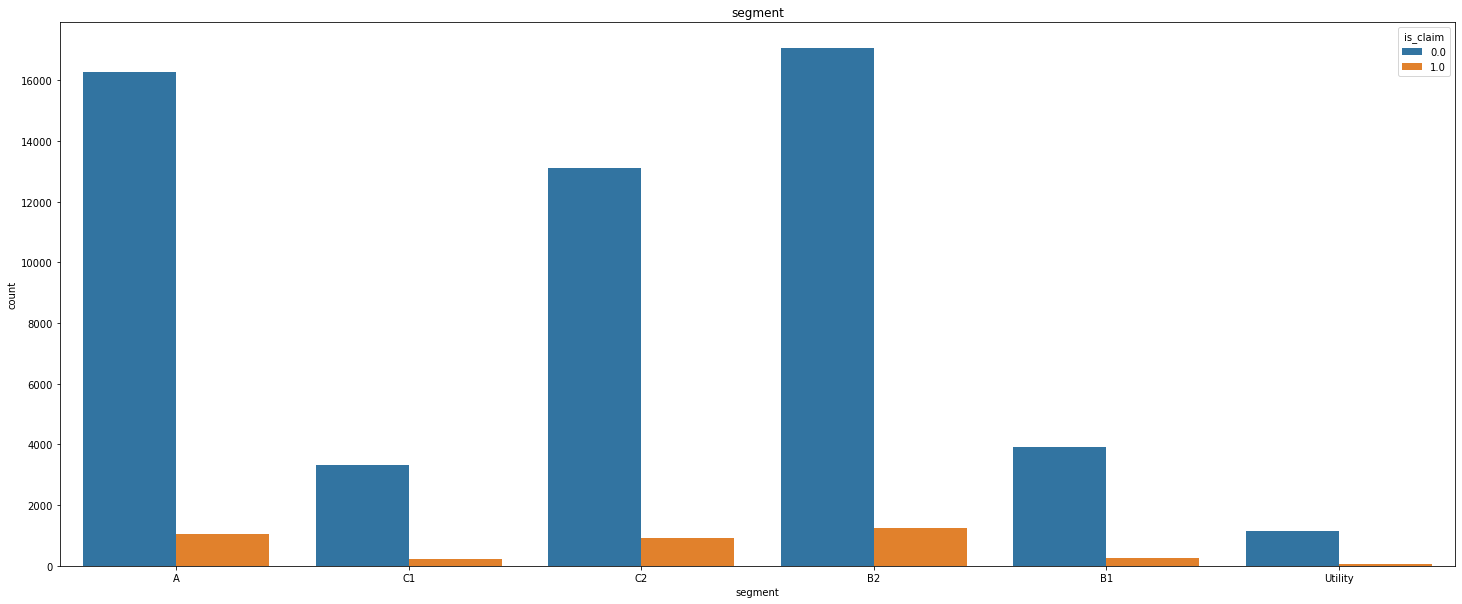

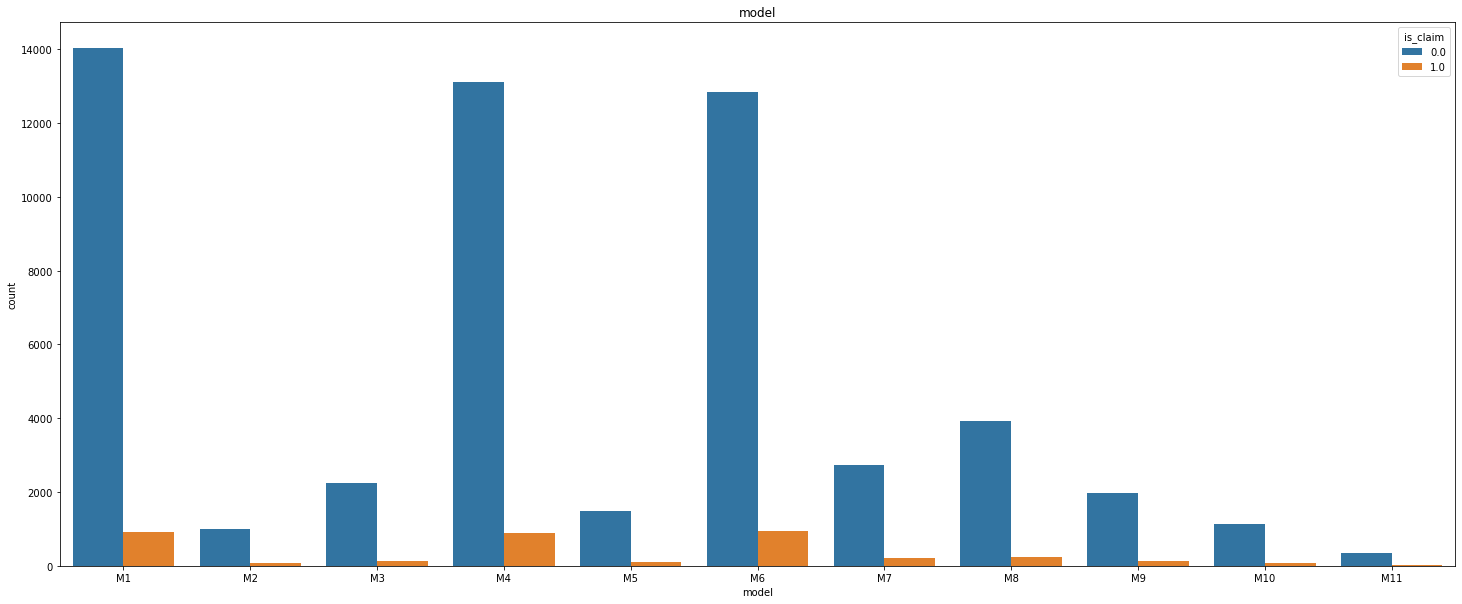

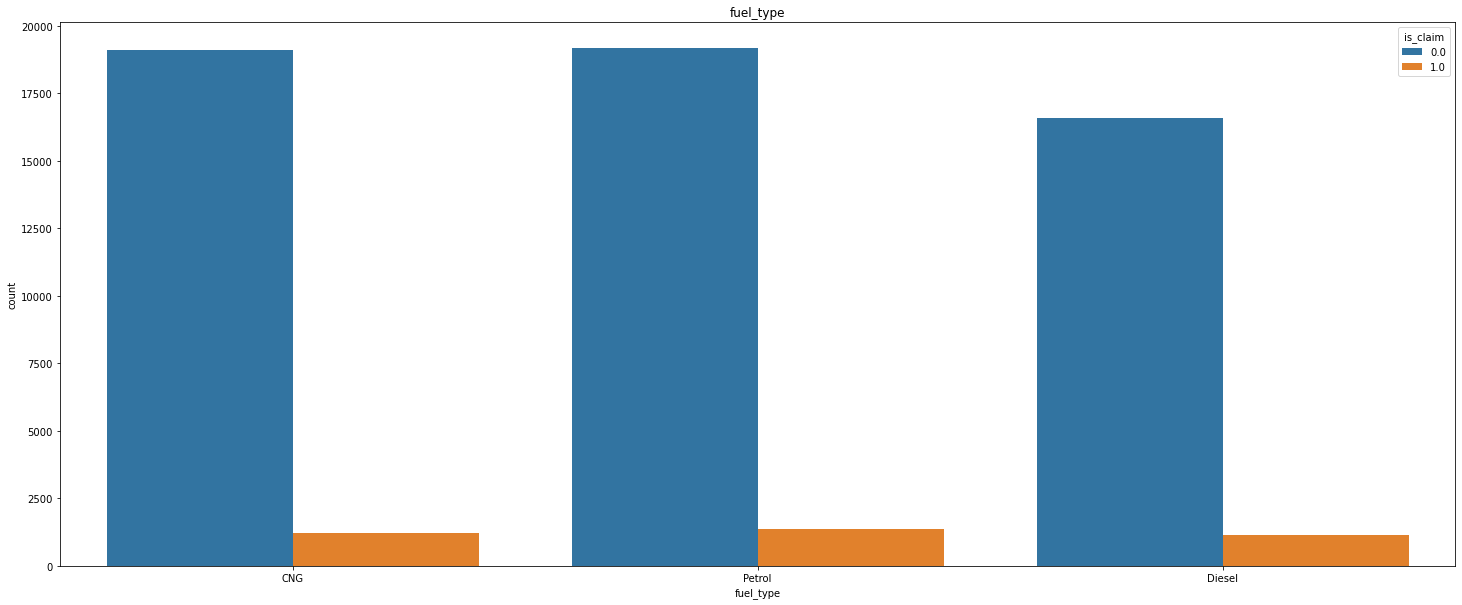

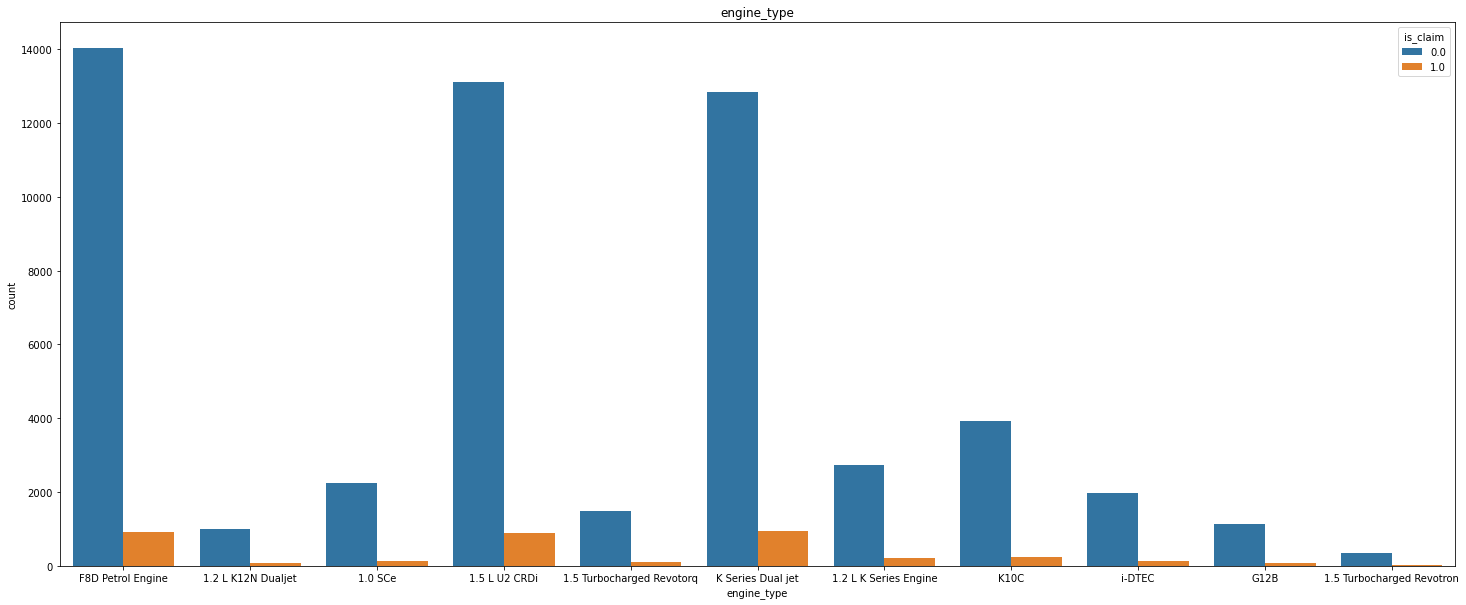

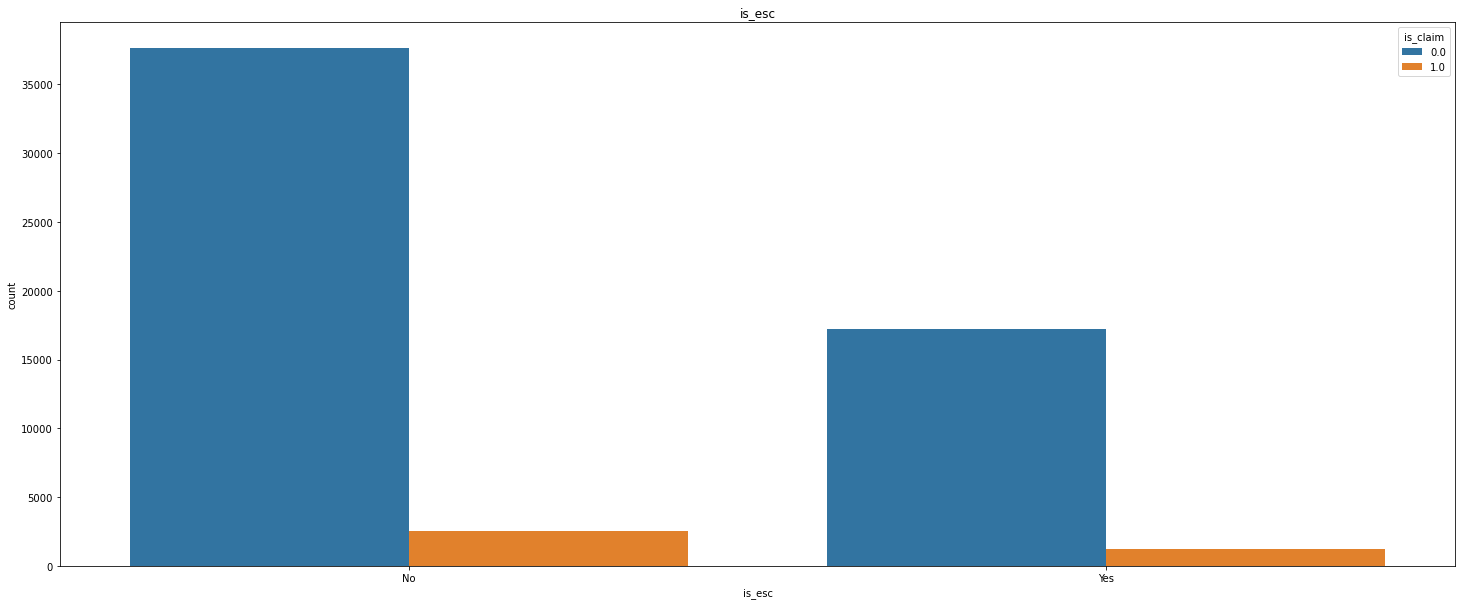

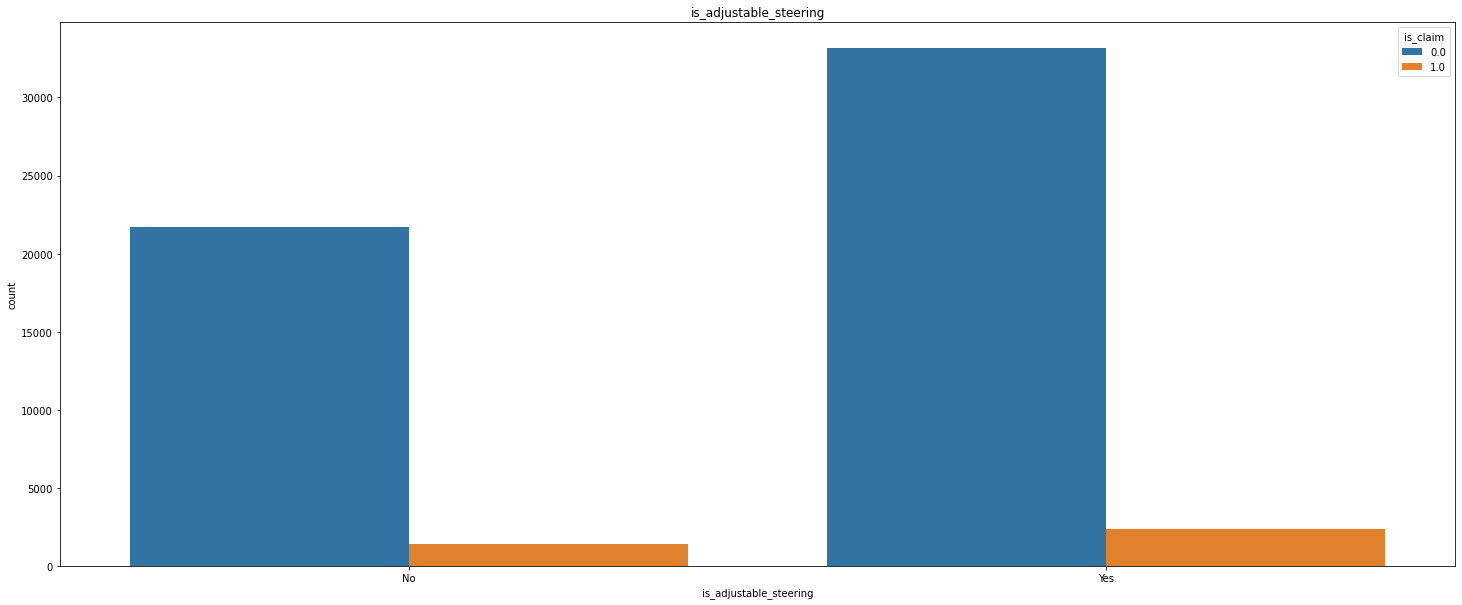

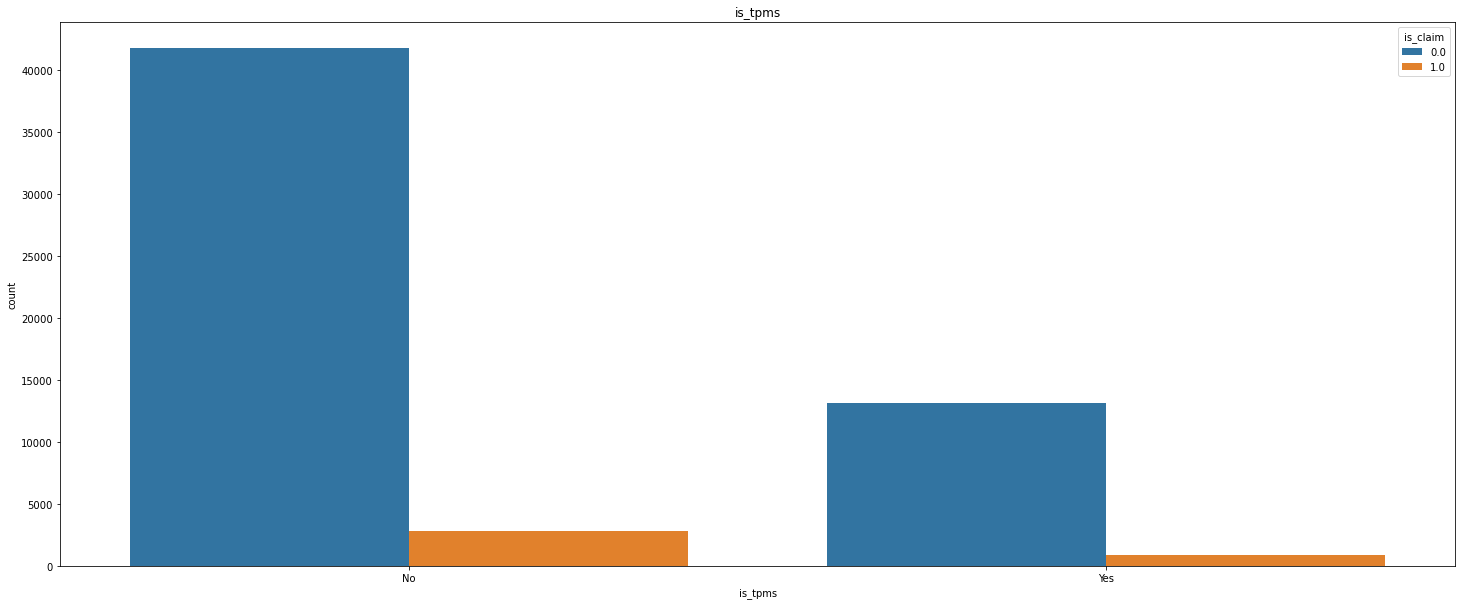

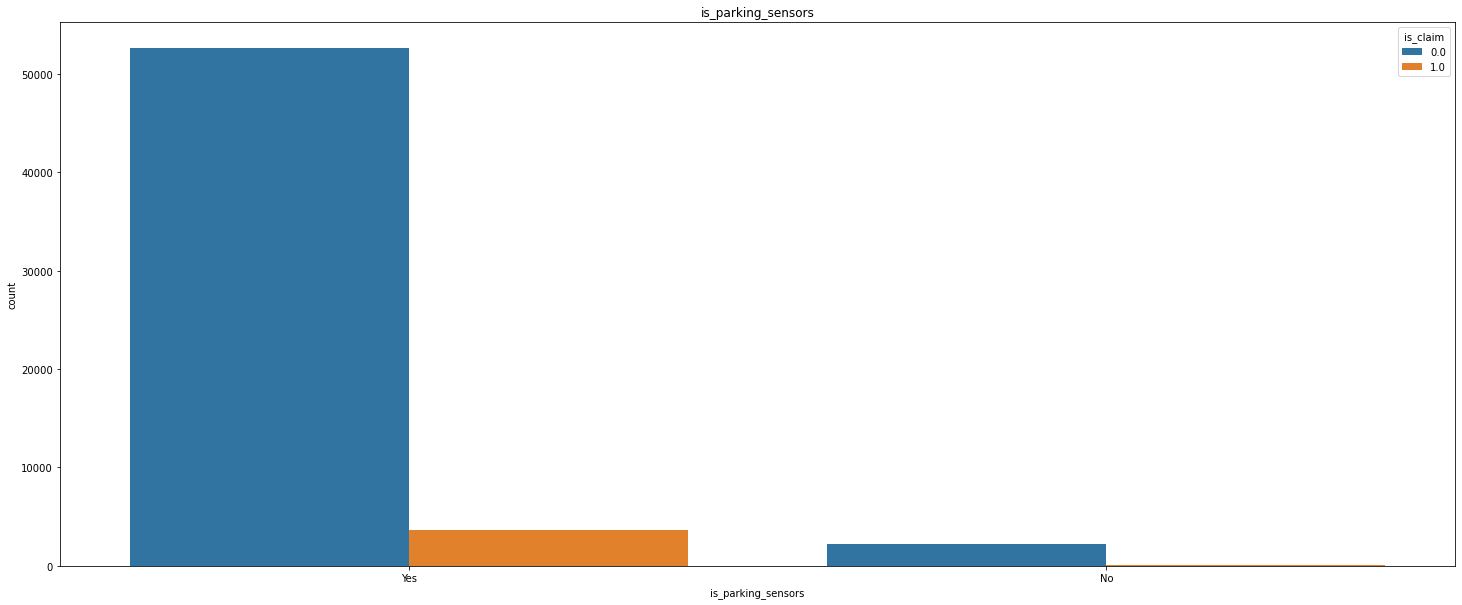

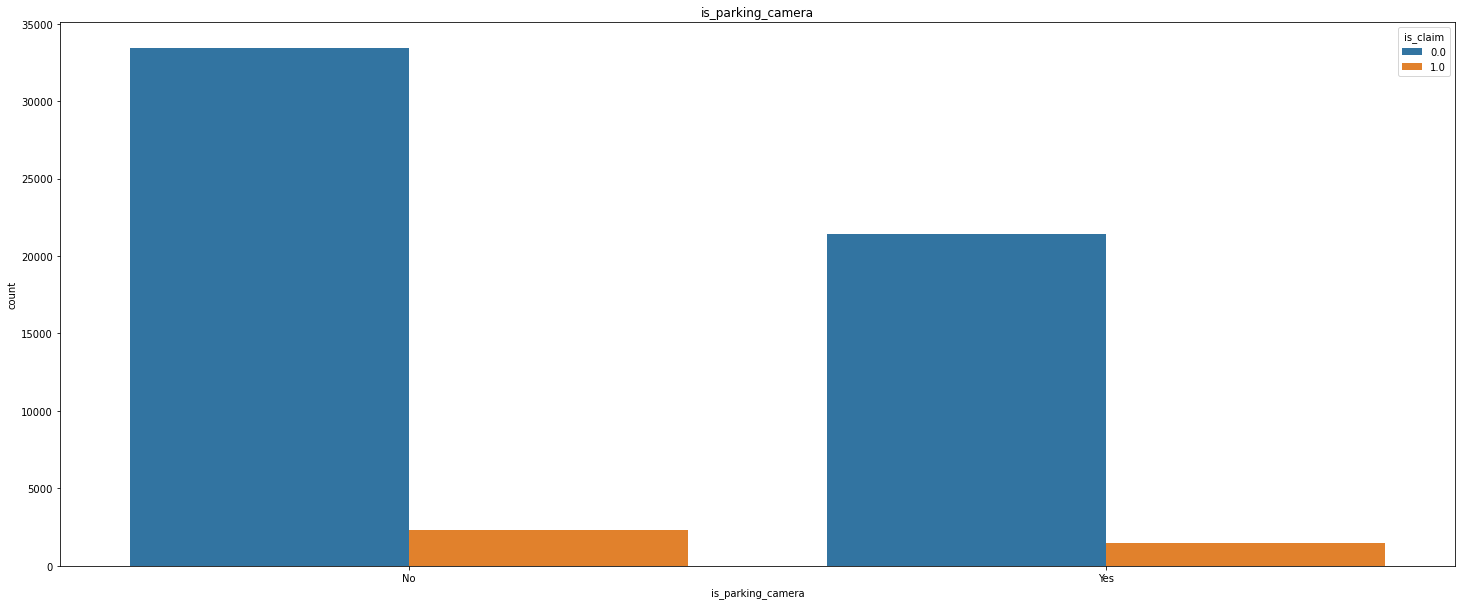

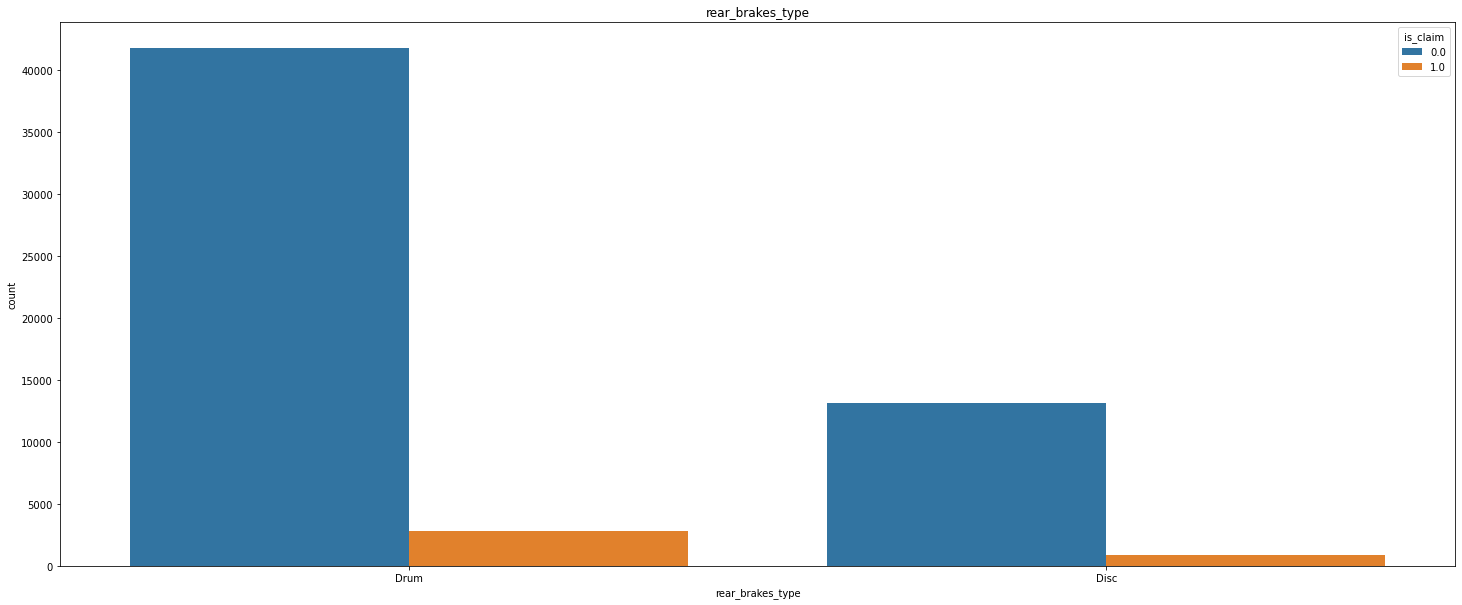

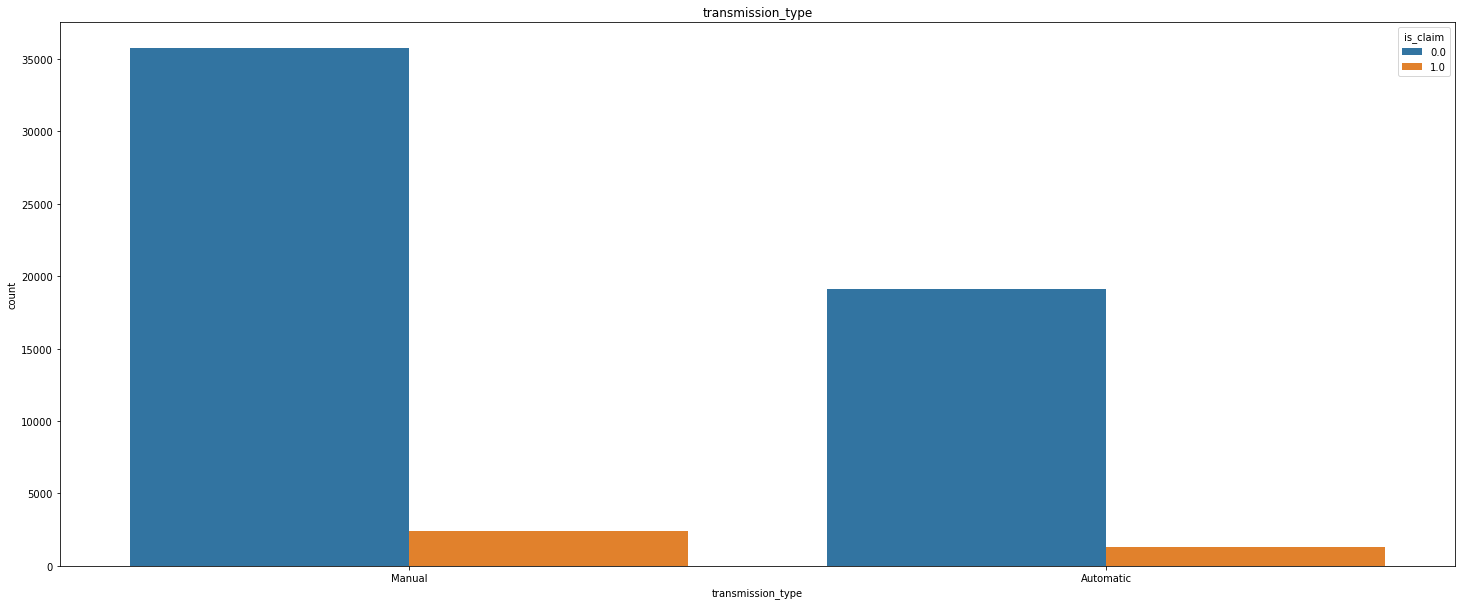

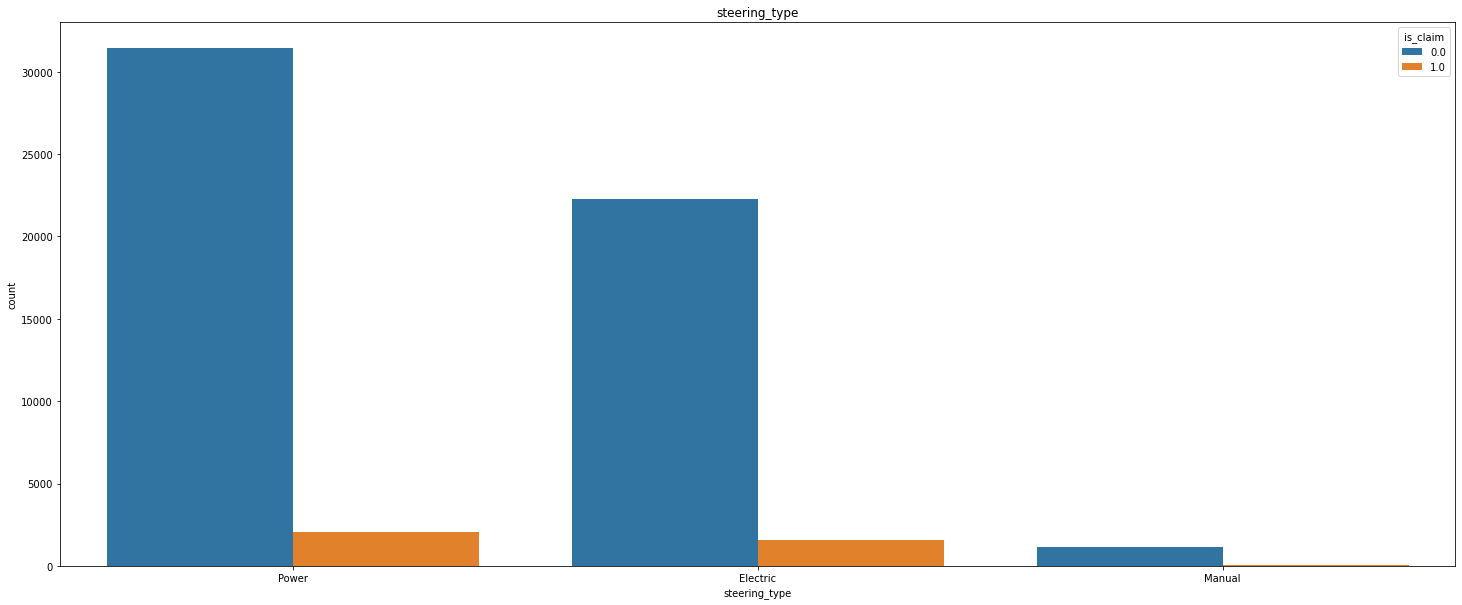

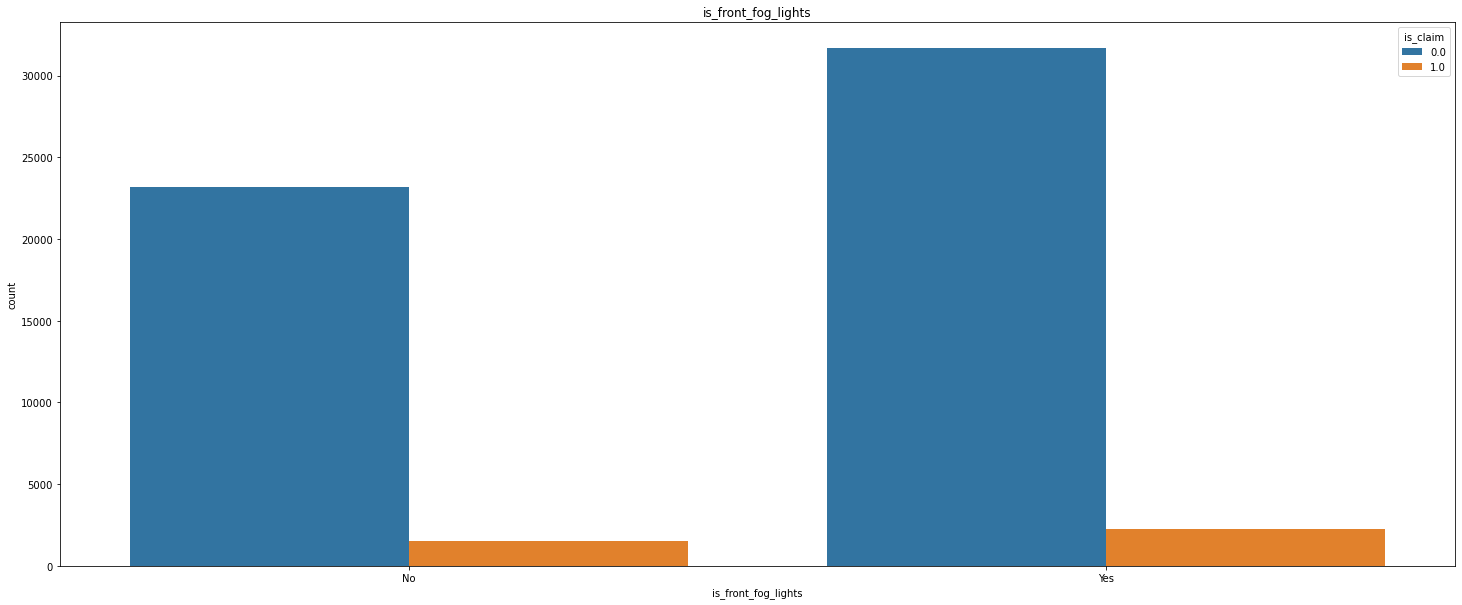

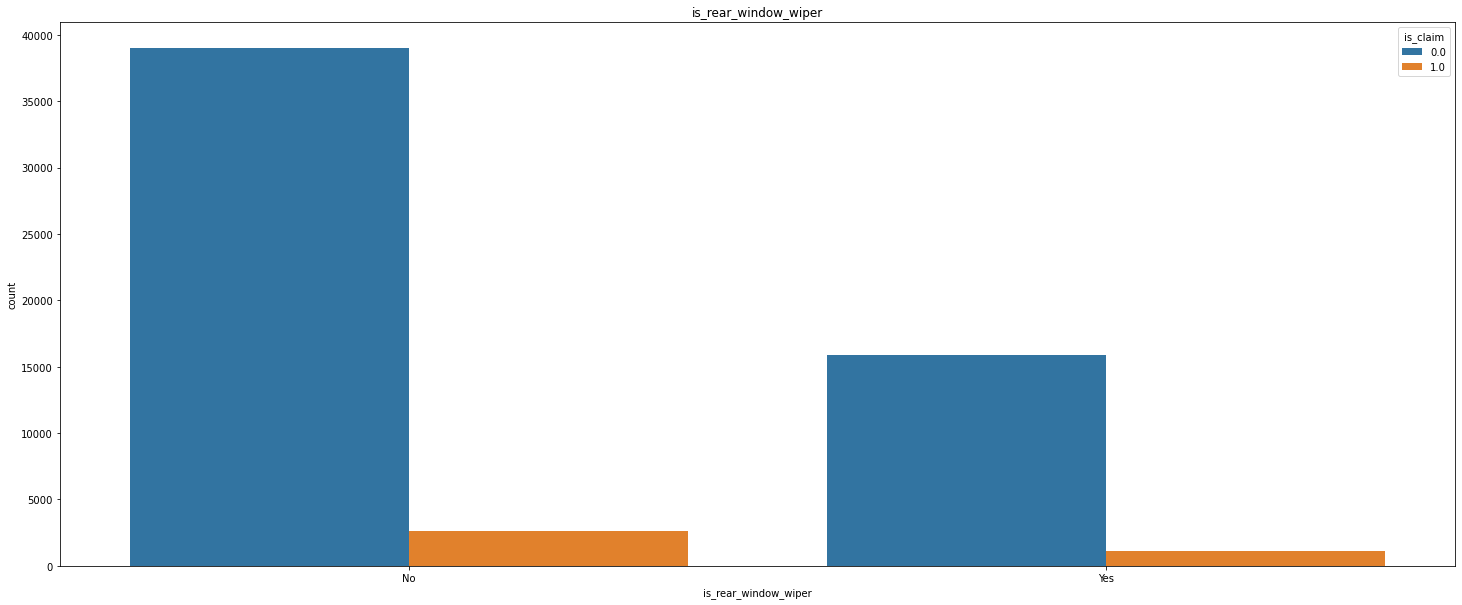

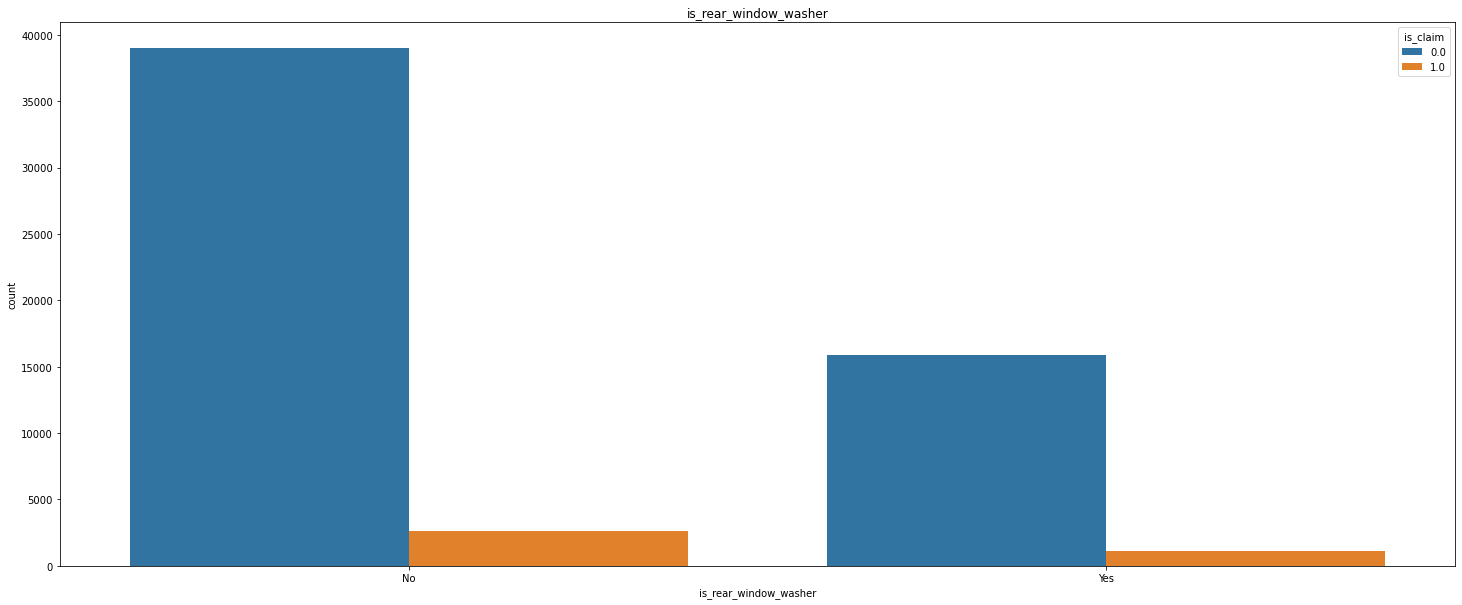

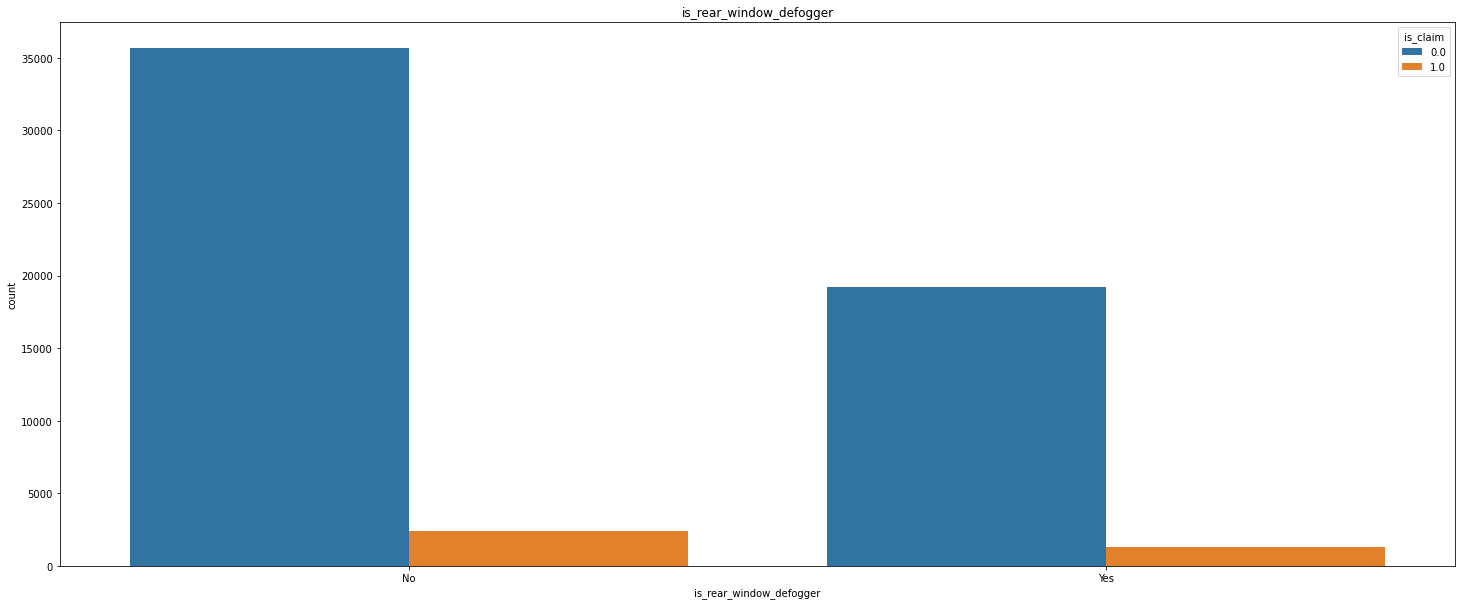

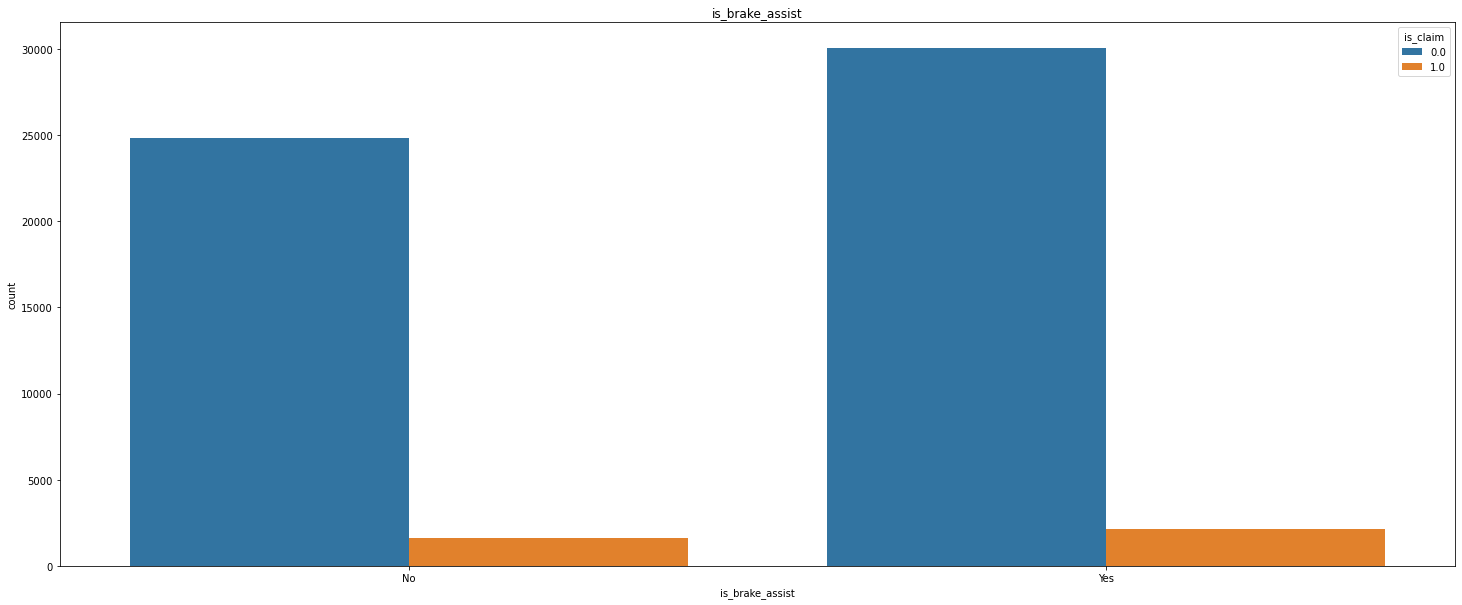

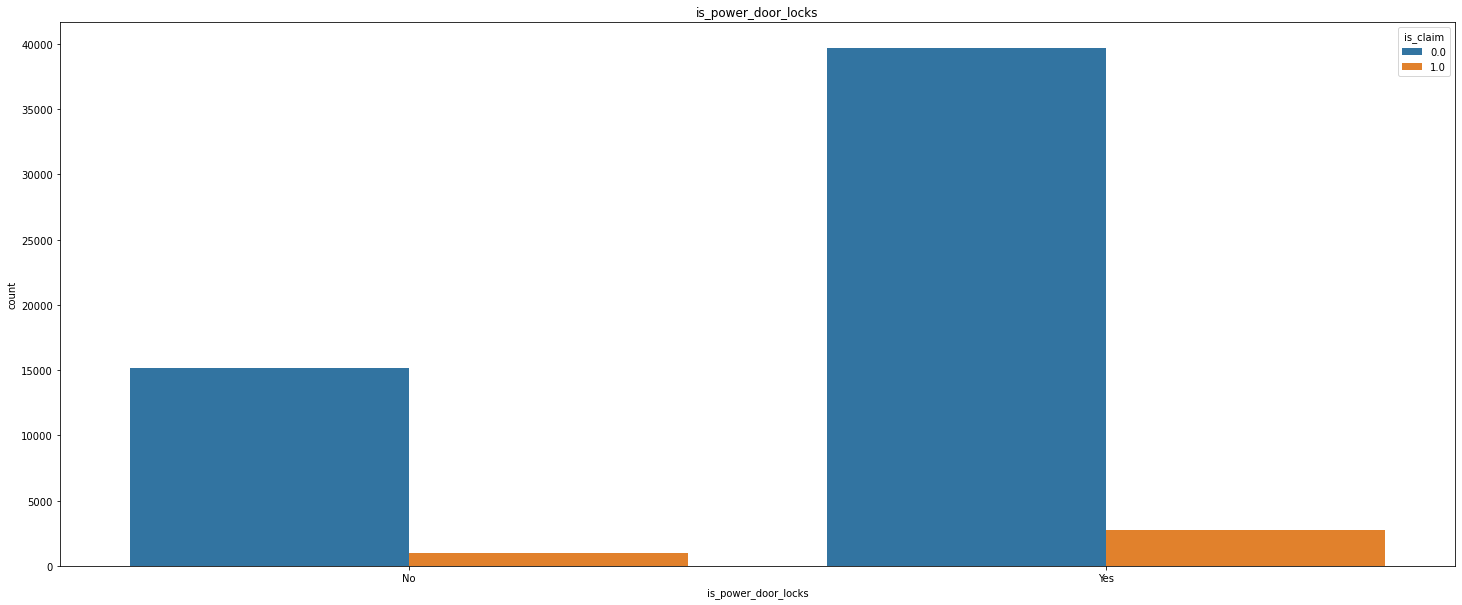

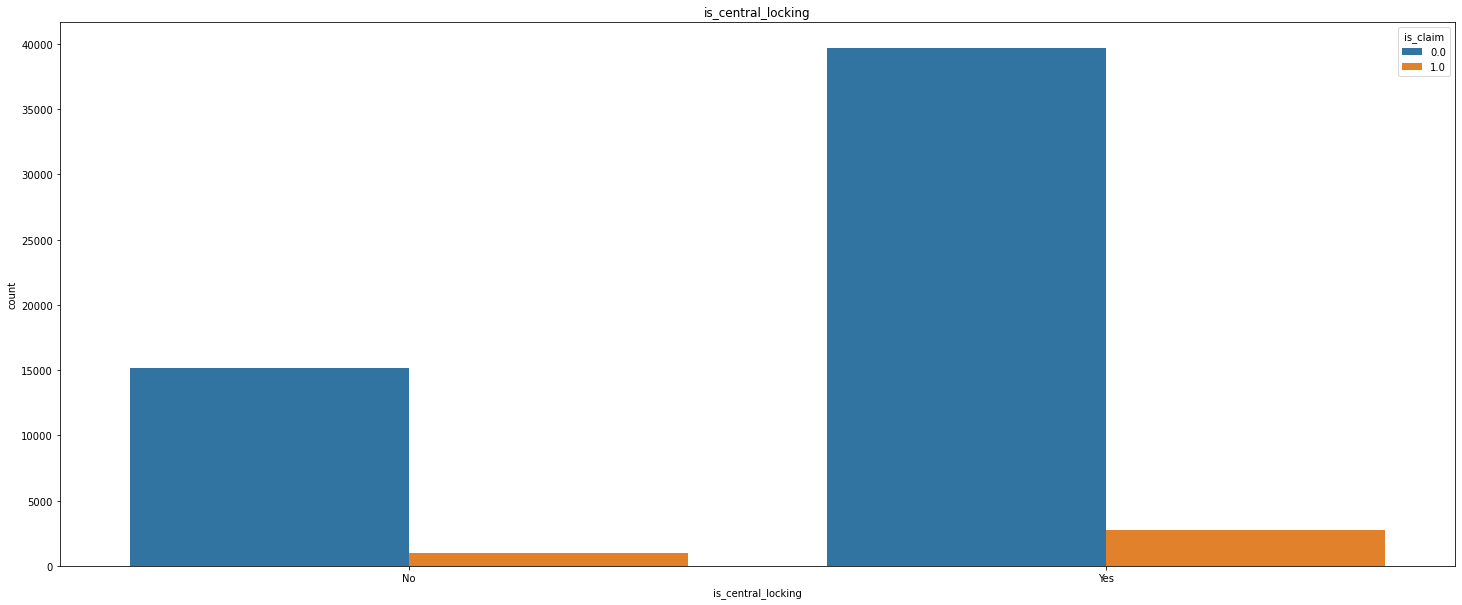

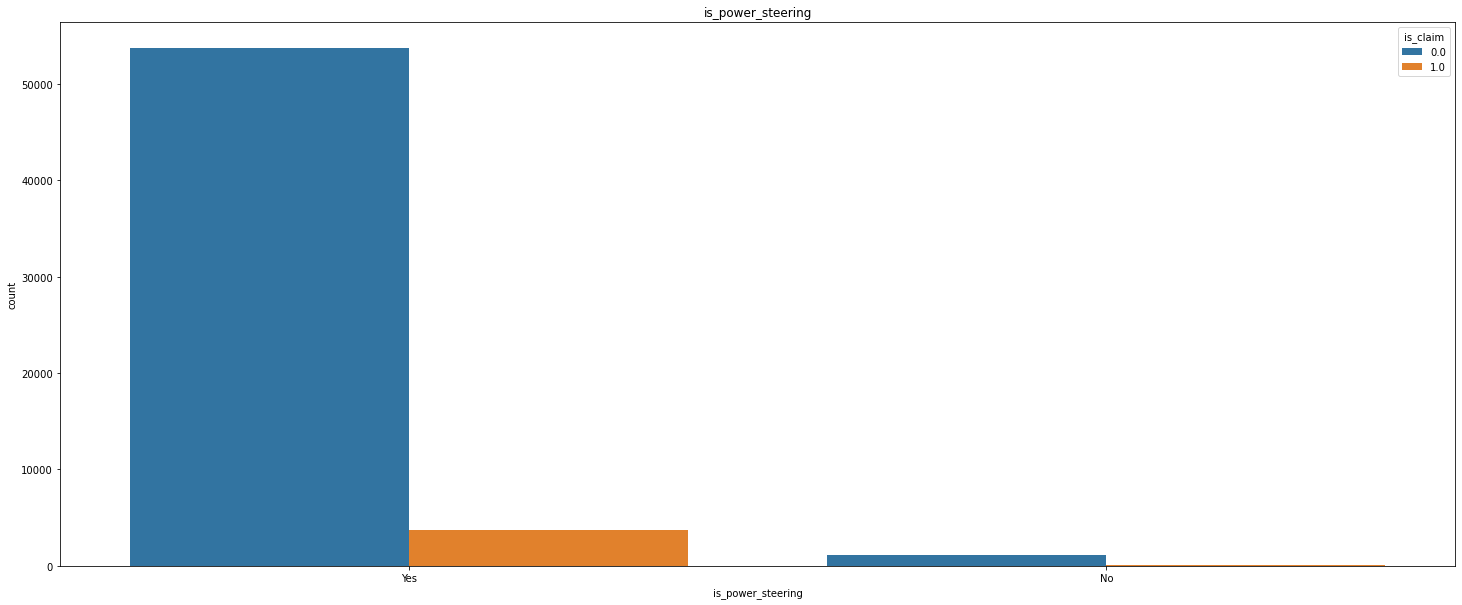

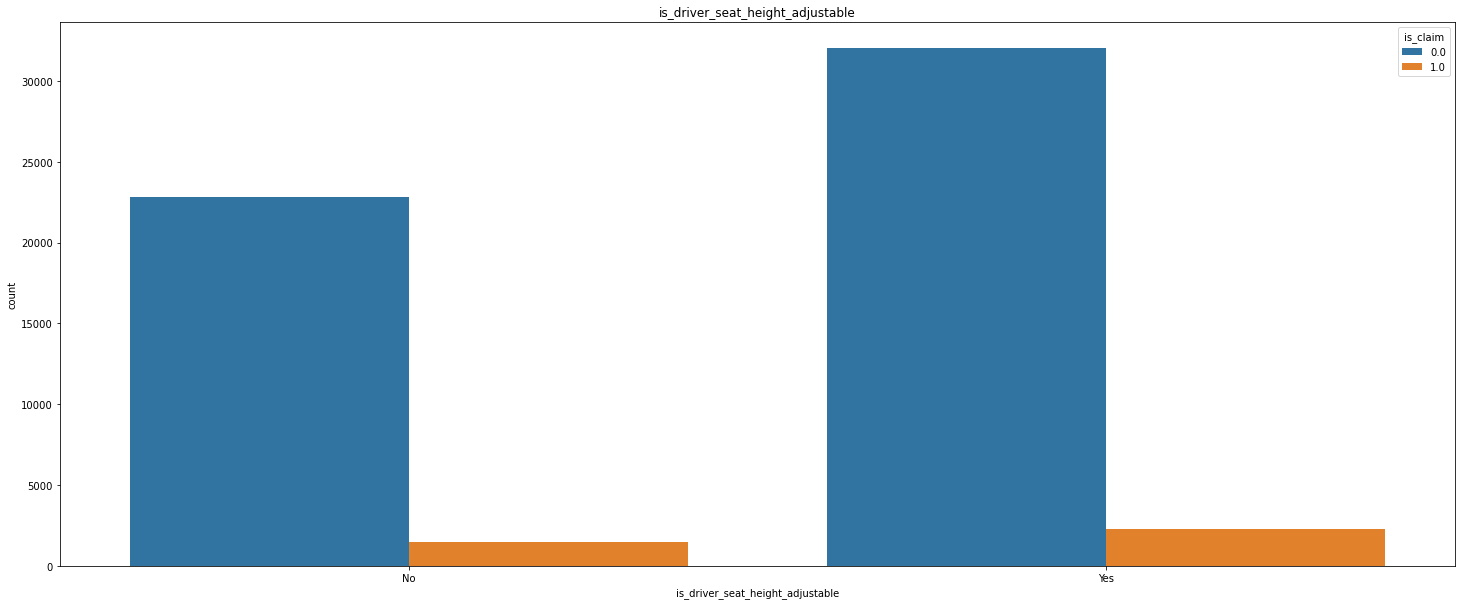

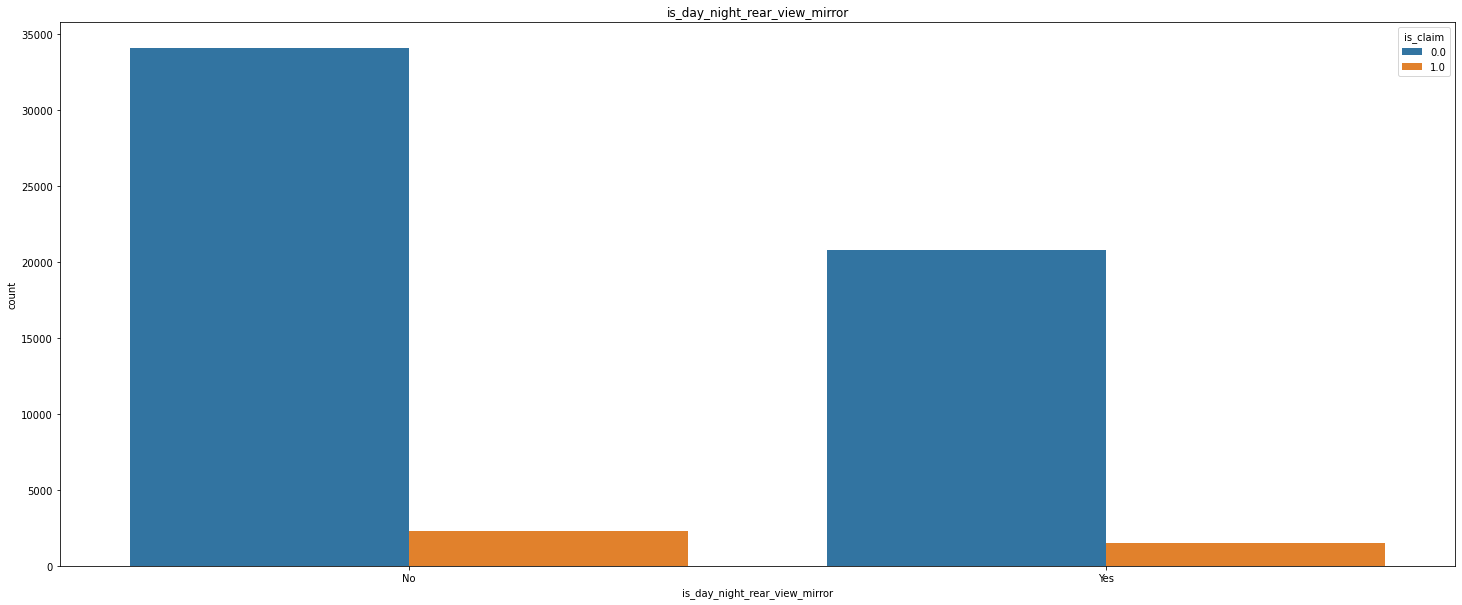

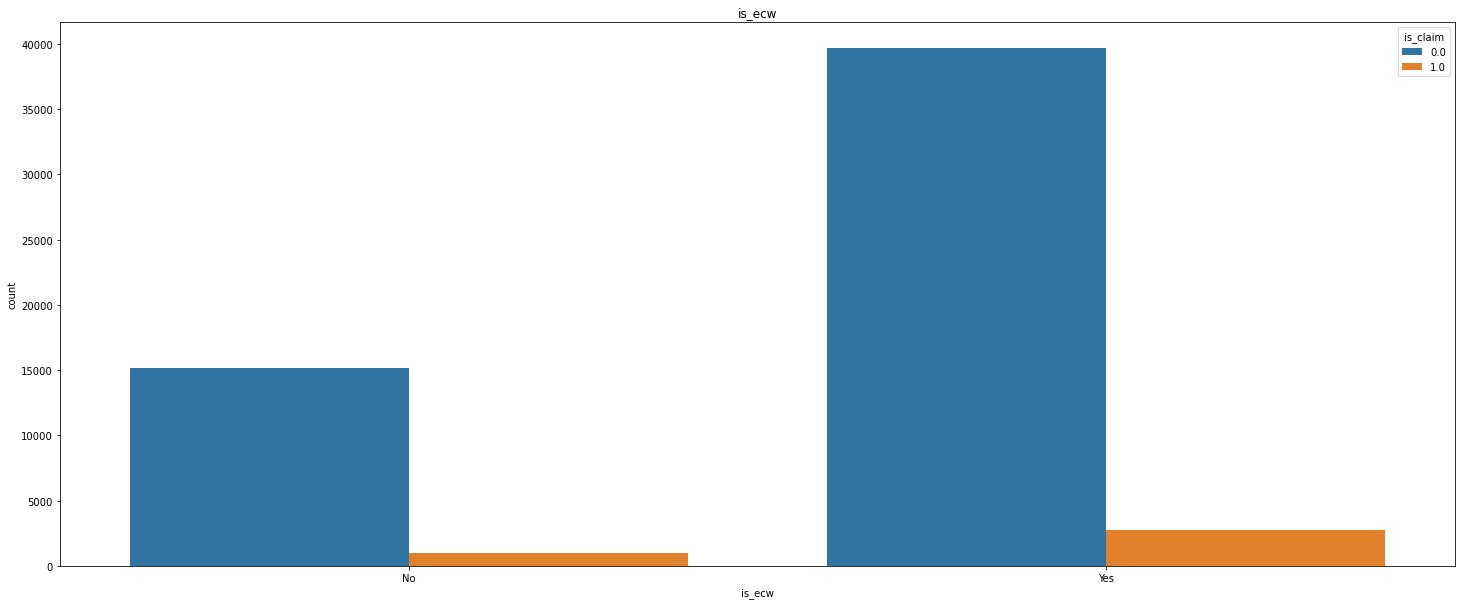

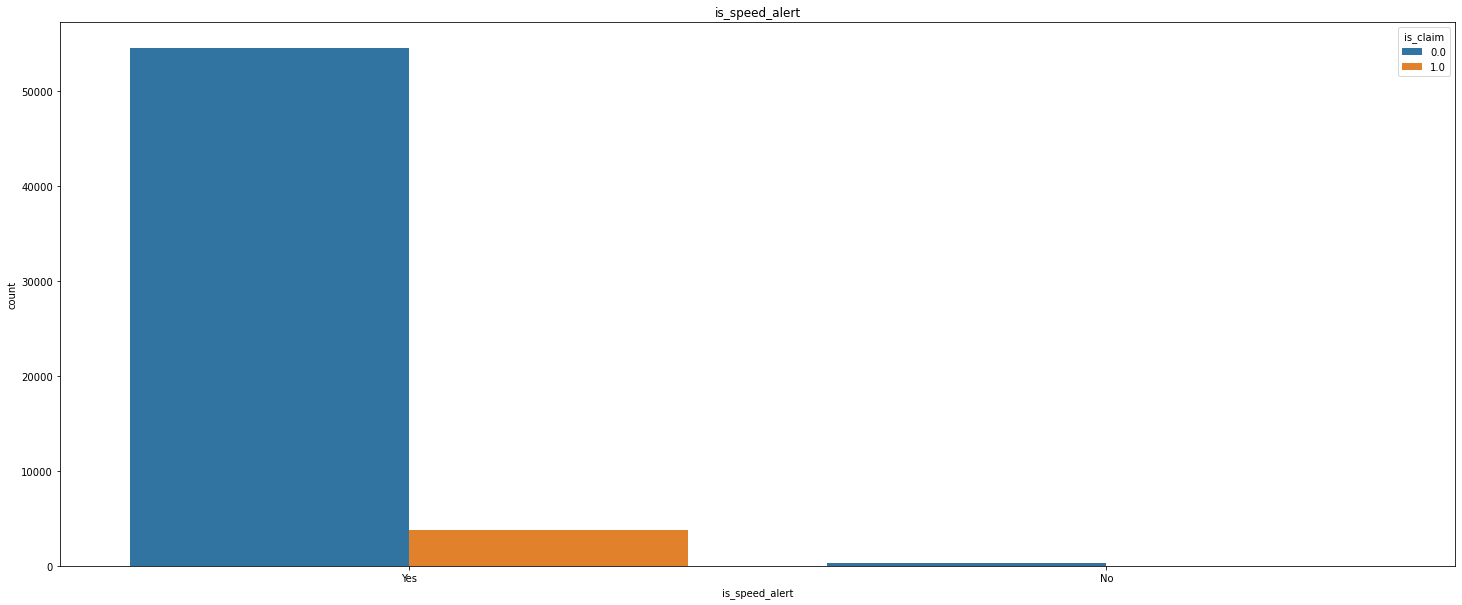

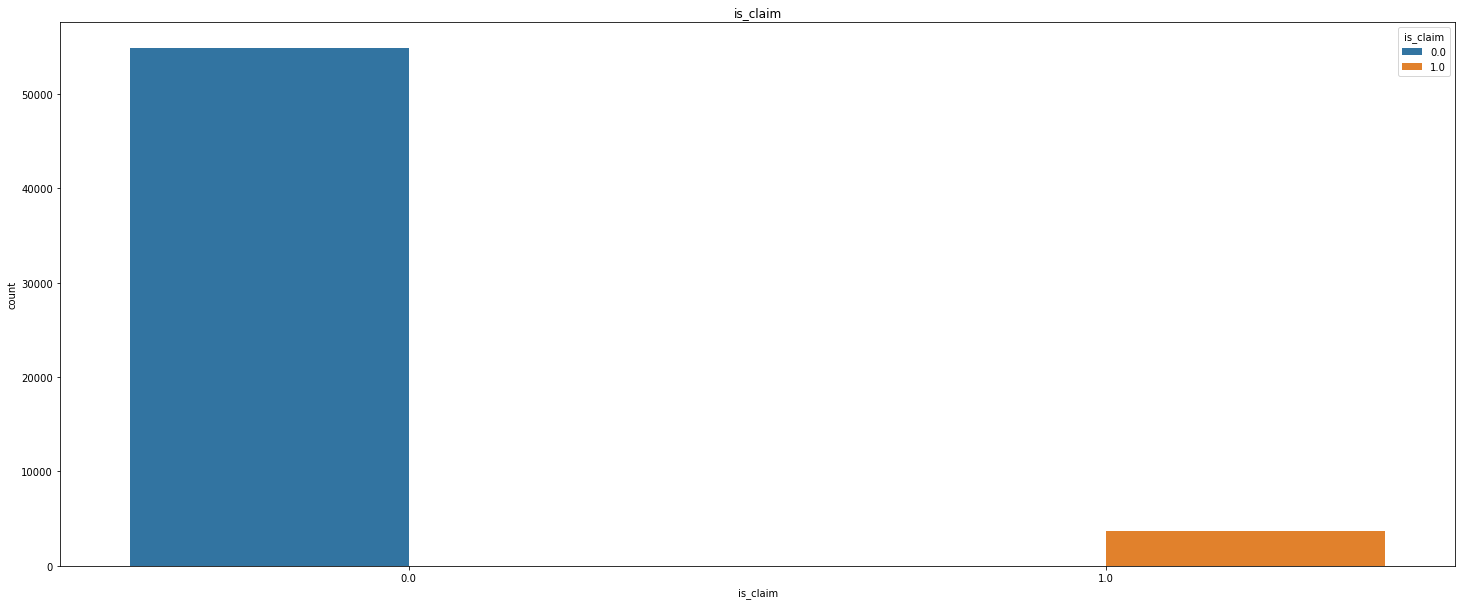

In [16]:
# cat vs cat

for i in cat_cols:
    sns.countplot(combined[i],hue=combined['is_claim'])
    plt.title(i)
    plt.show()
    
    
# C8 is the area cluster from where most of the claims emerge.
# K series dual Jet Engine, No parking camera
# Model M6, B2 segment, Drum brakes are some of the components
# bringing claims to the doors of Insurance company.

In [17]:
combined.isnull().sum()

policy_id                               0
policy_tenure                           0
age_of_car                              0
age_of_policyholder                     0
area_cluster                            0
population_density                      0
make                                    0
segment                                 0
model                                   0
fuel_type                               0
max_torque                              0
max_power                               0
engine_type                             0
airbags                                 0
is_esc                                  0
is_adjustable_steering                  0
is_tpms                                 0
is_parking_sensors                      0
is_parking_camera                       0
rear_brakes_type                        0
displacement                            0
cylinder                                0
transmission_type                       0
gear_box                          

# Feature Engineering and Statistical Feature selection

In [18]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [19]:
combined.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

c = ['is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert','is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera']
for i in c:
    combined[i]= pd.get_dummies(combined[i],drop_first=True)

In [20]:
combined.shape

(97655, 44)

In [21]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0.0


In [22]:
cols = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']

In [23]:
for x in cols:
    combined[x] = combined[x].map({'Yes':1,'No':0})

In [24]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0


In [25]:
# Torque and bhp

combined[['bhp','rpm_torque']]=combined.max_power.str.split('@',expand=True)

In [26]:
combined.shape

(97655, 46)

In [27]:
combined.rename(columns={'rpm_torque':'rpm_power'},inplace=True)

In [28]:
combined[['Nm','rpm_torque']] = combined.max_torque.str.split('@',expand=True)

In [29]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50bhp,6000rpm,113Nm,4400rpm
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06bhp,5500rpm,91Nm,4250rpm


In [30]:
# remove bhp and rpm from the cols

combined['bhp']=combined['bhp'].apply(lambda x: float(x[:-3]))
combined['rpm_power']=combined['rpm_power'].apply(lambda x: float(x[:-3]))
combined['rpm_torque']=combined['rpm_torque'].apply(lambda x: float(x[:-3]))
combined['Nm']=combined['Nm'].apply(lambda x: float(x[:-2]))

In [31]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0


In [32]:
combined[['gross_weight','height','width']]

,gross_weight,height,width
0,1185,1475,1515
1,1185,1475,1515
2,1185,1475,1515
3,1335,1515,1735
4,1155,1490,1579
...,...,...,...
97650,1335,1530,1735
97651,1720,1635,1790
97652,1410,1500,1745
97653,1335,1515,1735


In [33]:
# weight per unit 
# age = age of the car/age of the policy holder
# per unit power = rpm/bhp
# per unit torque = rpm_torque/Nm

for i in [combined]:
    i['weight_per_unit'] = i['gross_weight']/(i['height']*i['width']*i['length'])
    i['per_unit_power'] = i['rpm_power']/i['bhp']
    i['per_unit_torque'] = i['rpm_torque']/i['Nm']
    i['age'] = i['age_of_car']/i['age_of_policyholder']

In [34]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,...,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,...,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,...,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,...,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333


In [35]:
combined.shape

(97655, 52)

# Statistical Analysis

In [36]:
# num cols and apply ttest

combined.select_dtypes(include = np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim', 'bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age'],
      dtype='object')

In [37]:
num_cols = ['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density',
       'turning_radius', 'length', 'width', 'height', 'gross_weight','bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age']

In [38]:
len(num_cols)

17

In [39]:
import scipy.stats as stats

In [40]:
significant_features = []
for i in num_cols:
    zero = combined.loc[combined.is_claim==0, i]
    one = combined.loc[combined.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    if pvalue < 0.05:
        significant_features.append(i)
print(significant_features)

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'width', 'age']


In [41]:
# Categorical Target Encoding


In [42]:
! pip install category_encoders

In [43]:
import category_encoders as ce

In [44]:
combined.select_dtypes(exclude = np.number).columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating'],
      dtype='object')

In [45]:
cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

In [46]:
# Split the daaaaaaata into train and test

newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape

((58592, 52), (39063, 52))

In [47]:
# dropping target from newtest

newtrain.drop(['policy_id','max_power','max_torque'],axis=1,inplace=True)
newtest.drop(['policy_id','max_power','max_torque','is_claim'],axis=1,inplace=True)

In [48]:
newtrain.shape, newtest.shape

((58592, 49), (39063, 48))

In [49]:
cat_cols

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'ncap_rating']

In [50]:
# Target Encoding
# import category_encoders as ce



cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
       'engine_type', 'rear_brakes_type',
       'transmission_type', 'steering_type', 'ncap_rating']

tgt_encoder = ce.TargetEncoder(cols = cat_cols)



X = newtrain.drop('is_claim',axis=1)
y = newtrain['is_claim']


newx = tgt_encoder.fit_transform(X,y)
newtest = tgt_encoder.transform(newtest)


In [51]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,0.063854,5,0.062026,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0.063871,1197,4,0.064181,5,0.066873,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,0.064181,5,0.066873,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333


In [52]:
# Apply StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

newx.select_dtypes(include = np.number).columns

cols = ['policy_tenure', 'population_density', 'displacement', 'turning_radius',
        'length', 'width', 'height', 'gross_weight', 'bhp', 'rpm_power',
        'Nm', 'rpm_torque', 'weight_per_unit', 'per_unit_power',
        'per_unit_torque']

for i in cols:
    newx.loc[:, i] = sc.fit_transform(pd.DataFrame(newx.loc[:, i]))
    newtest.loc[:, i] = sc.fit_transform(pd.DataFrame(newtest.loc[:, i]))

# Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# List of models
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['etree'] = ExtraTreesClassifier()
    models['adaboost'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    return models

In [54]:
# Evaluate the model

from sklearn.model_selection import StratifiedKFold, cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle=True, 
                         random_state=100)
    scores = cross_val_score(estimator=model,
                             X=newx, y = y,
                             scoring = 'f1', cv = cv,
                             error_score='raise',
                             n_jobs = -1)
    return scores





In [55]:
# Build the models

models = base_models()

# List for result and model names

result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model)
    result.append(scores) # this will save the f1 scores
    names.append(name) # store model name
    print('>%s %.3f (%.3f)' % (name, np.mean(result), np.std(result)))

>lg 0.000 (0.000)
>dtree 0.043 (0.044)
>rf 0.035 (0.038)
>etree 0.034 (0.034)
>adaboost 0.027 (0.033)
>gbm 0.023 (0.032)
>xgb 0.019 (0.031)
>lgbm 0.017 (0.029)


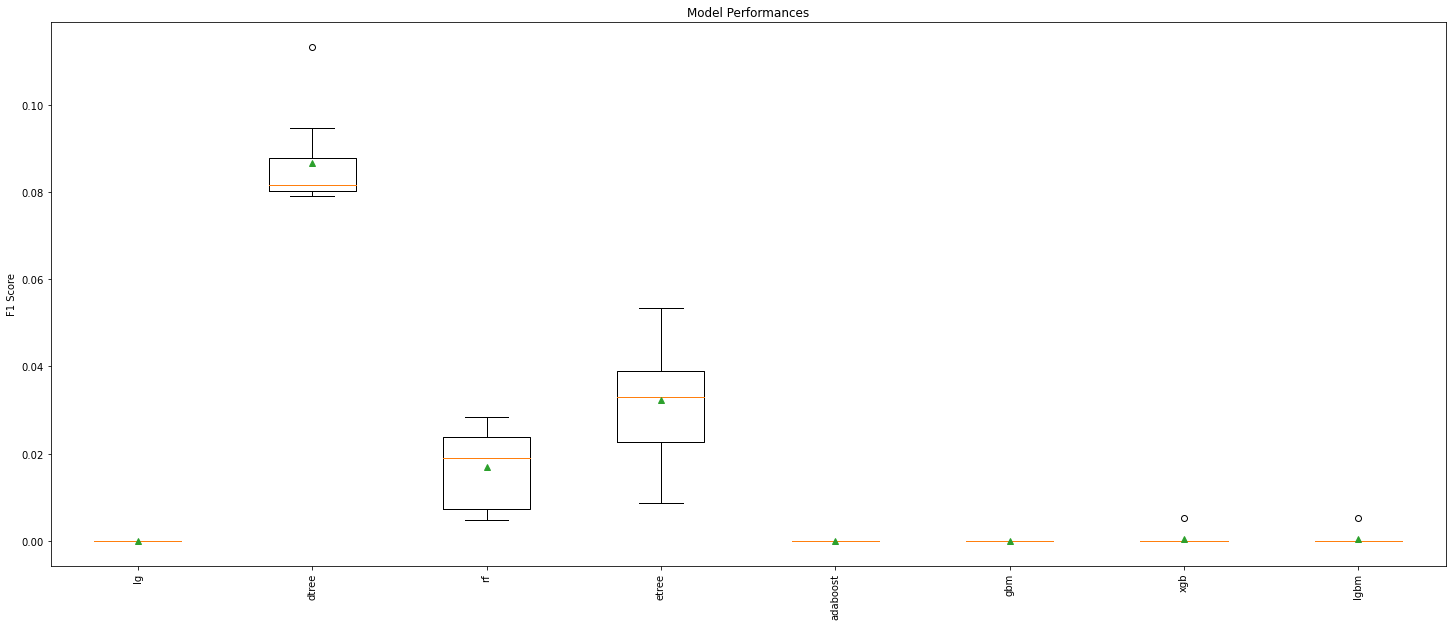

In [56]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel('F1 Score')
plt.title('Model Performances')
plt.show()

# Smote for handling Imbalance

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

smotex, smotey = smote.fit_resample(newx, y)

# List of models
def base_models():
    models = dict()
    models['lg'] = LogisticRegression()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['etree'] = ExtraTreesClassifier()
    models['adaboost'] = AdaBoostClassifier()
    models['gbm'] = GradientBoostingClassifier()
    models['xgb'] = XGBClassifier()
    models['lgbm'] = LGBMClassifier()
    return models

from sklearn.model_selection import StratifiedKFold, cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle=True, 
                         random_state=100)
    scores = cross_val_score(estimator=model,
                             X=smotex, y = smotey,
                             scoring = 'f1', cv = cv,
                             error_score='raise',
                             n_jobs = -1)
    return scores

models = base_models()

# List for result and model names

result, names = list(), list()

for name, model in models.items():
    scores = eval_models(model)
    result.append(scores) # this will save the f1 scores
    names.append(name) # store model name
    print('>%s %.3f (%.3f)' % (name, np.mean(result), np.std(result)))

>lg 0.586 (0.006)
>dtree 0.751 (0.165)
>rf 0.812 (0.160)
>etree 0.842 (0.148)
>adaboost 0.818 (0.141)
>gbm 0.828 (0.131)
>xgb 0.847 (0.130)
>lgbm 0.861 (0.126)


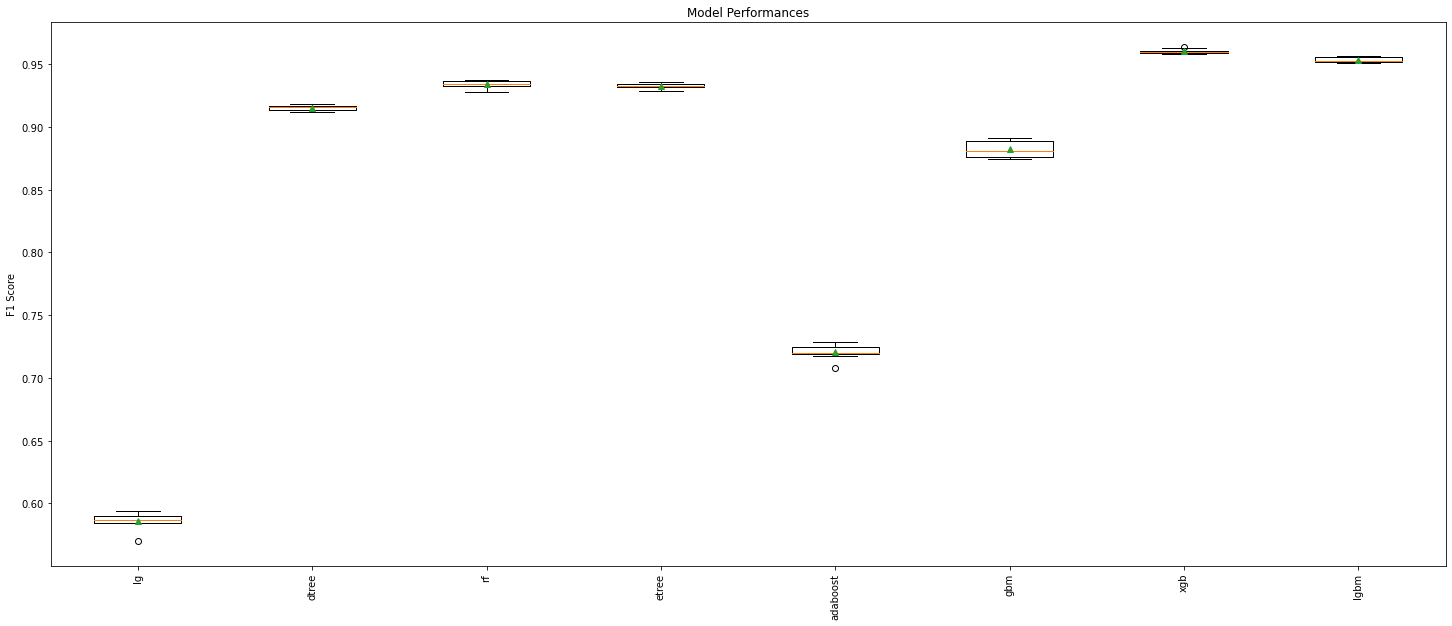

In [59]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel('F1 Score')
plt.title('Model Performances')
plt.show()

In [61]:
# RF, etree, gbm, xgb, lgbm

# Final random forest model

rf = RandomForestClassifier()

pred = []

kfold = StratifiedKFold(n_splits=11, 
                        shuffle = True,
                        random_state=42)
for train_index, test_index in kfold.split(smotex, smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred.append(rf.fit(xtrain, ytrain).predict(newtest))

In [62]:
#submission
finalpred = pd.DataFrame(pred).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('RFModel.csv',index=False)

In [63]:
xgb = XGBClassifier()

pred_xgb = []

kfold = StratifiedKFold(n_splits=10, 
                        shuffle = True,
                        random_state=42)
for train_index, test_index in kfold.split(smotex, smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred_xgb.append(xgb.fit(xtrain, ytrain).predict(newtest))

In [64]:
finalpred = pd.DataFrame(pred_xgb).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('XGBModel.csv',index=False)

In [65]:
etree = ExtraTreesClassifier()

pred_etree = []
for train_index, test_index in kfold.split(smotex, smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred_etree.append(etree.fit(xtrain, ytrain).predict(newtest))

In [66]:
finalpred = pd.DataFrame(pred_etree).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('ETreeModel.csv',index=False)

In [67]:
gbm = GradientBoostingClassifier()

pred_gbm = []

for train_index, test_index in kfold.split(smotex, smotey):
    xtrain = smotex.loc[train_index]
    ytrain = smotey.loc[train_index]
    pred_gbm.append(gbm.fit(xtrain, ytrain).predict(newtest))

In [68]:
finalpred = pd.DataFrame(pred_gbm).T.mode(axis=1)[0]
sub = pd.DataFrame({'policy_id':test.policy_id,'is_claim':finalpred})
sub.to_csv('GBMModel.csv',index=False)

# Next Steps

* reduce the fold to 5
* try paramater tuning for xgb and gbm
* Take logistic regression as the best model and create a stacking classifier